# Generate ALOGIT input from ActivitySim Estimation Data Bundles

This notebook reads tour destination choice estimation data bundles and generates ALOGIT format inputs for destination choice estimation  


## Load Libraries

In [1]:
import pandas as pd
pd.set_option("display.max_columns",250)
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
import openmatrix as omx
from datetime import datetime

SKIM_PATH = r'E:\Met_Council\metc-asim-model\Base_2018\OMX\allskims.omx'
SKIM_TABLE = 'DIST'

In [2]:
omx_file = omx.open_file(SKIM_PATH, 'r')
#dist_skim = np.zeros([])

dist_skim = np.array(omx_file[SKIM_TABLE])
omx_file.close()

## Load Estimation Data Bundle

In [3]:
asim_output_folder = r'E:\Met_Council\metc-asim-model\estimation\output'
asim_data_folder = r'E:\Met_Council\metc-asim-model\estimation\data'
edb_folder = os.path.join(asim_output_folder, 'estimation_data_bundle')
mwcog_data_folder = r'E:\Met_Council\survey_data'
output_folder = r'E:\Met_Council\metc-asim-model\estimation\output\work_loc_estimation'

In [4]:
work_location_folder = os.path.join(edb_folder, 'workplace_location')

work_chooser_create_time = os.path.getctime(os.path.join(work_location_folder, 'workplace_location_choosers_combined.csv'))
work_alts_create_time = os.path.getctime(os.path.join(work_location_folder, 'workplace_location_alternatives_combined.csv'))
work_landuse_create_time = os.path.getctime(os.path.join(work_location_folder, 'workplace_location_landuse.csv'))

print(f"Chooser file timestamp: {datetime.fromtimestamp(work_chooser_create_time).strftime('%c')}")
print(f"Alternative file timestamp: {datetime.fromtimestamp(work_alts_create_time).strftime('%c')}")
print(f"Land use file timestamp: {datetime.fromtimestamp(work_landuse_create_time).strftime('%c')}")

Chooser file timestamp: Mon Feb 12 10:25:20 2024
Alternative file timestamp: Mon Feb 12 10:30:27 2024
Land use file timestamp: Mon Feb 12 07:39:29 2024


## Converting ActivitySim Estimation Output to ALOGIT input

ALOGIT tables are of the form:

person_id, taz1_dist, taz2_dist,.... taz1_logsum, taz2_logsum, .... person_vars, hh_vars

and taz characteristics file:

taz cols: taz1, taz2, taz3

rows: size term segment1

      size term segment2
      
      ...

In [5]:
asim_per_df = pd.read_csv(os.path.join(asim_output_folder, 'final_persons.csv'))
asim_hh_df = pd.read_csv(os.path.join(asim_output_folder, 'final_households.csv'))

override_per_df_in = pd.read_csv(os.path.join(asim_data_folder, 'override_persons.csv'))
override_hh_df_in = pd.read_csv(os.path.join(asim_data_folder, 'override_households.csv'))

In [6]:
# overrides have multiple days of data, move down to one

override_hh_df = override_hh_df_in.groupby('HH_ID').first().reset_index()
override_hh_df

,HH_ID,household_id,home_zone_id,income,hhsize,HHT,auto_ownership,num_workers,children,day,transponder_ownership,survey_year,day.1,chauf_id1,chauf_id2,child_id1,child_id2,child_id3,school_escorting_outbound,school_escorting_inbound,school_escorting_outbound_cond,joint_tour_frequency,joint_tour_frequency_composition,has_joint_tour
0,18112062,14033,756,76750.73,5,1,3,1,3,4,True,2016,4,NaN,NaN,NaN,NaN,NaN,1,1,1,0_tours,0,0
1,18114244,1,1191,167.24,6,1,0,0,4,1,False,2016,1,NaN,NaN,NaN,NaN,NaN,1,1,1,0_tours,0,0
2,18114304,2,2931,103374.66,1,6,1,1,0,1,True,2016,1,NaN,NaN,NaN,NaN,NaN,1,1,1,0_tours,0,0
3,18114536,3,2583,81633.46,2,1,2,0,0,1,True,2016,1,NaN,NaN,NaN,NaN,NaN,1,1,1,0_tours,0,0
4,18114695,4,2651,85278.84,4,1,2,2,2,1,True,2016,1,NaN,NaN,NaN,NaN,NaN,1,1,1,1_Shop,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15663,22002786,27090,1130,113482.00,4,1,2,2,2,1,True,2022,1,63595.0,63594.0,63596.0,63597.0,NaN,1,1,1,0_tours,0,0
15664,22002788,27091,1931,140538.00,3,1,2,2,1,1,True,2022,1,79998.0,79999.0,80000.0,NaN,NaN,1,1,1,0_tours,0,0
15665,22002789,27092,1107,116237.00,3,1,2,2,1,1,True,2022,1,80002.0,80001.0,80003.0,NaN,NaN,1,1,1,0_tours,0,0
15666,22002790,27093,2048,80743.00,3,1,2,1,1,1,True,2022,1,NaN,NaN,NaN,NaN,NaN,1,1,1,0_tours,0,0


In [7]:
override_per_df = override_per_df_in.groupby(['HH_ID', 'PER_ID']).first().reset_index()
override_per_df

,HH_ID,PER_ID,person_id,household_id,PNUM,age,SEX,pemploy,pstudent,is_student,ptype,school_zone_id,workplace_zone_id,free_parking_at_work,work_from_home,telecommute_frequency,day,educ,transit_pass_subsidy,transit_pass_ownership,cdap_activity,mandatory_tour_frequency,_escort,_shopping,_othmaint,_othdiscr,_eatout,_social,non_mandatory_tour_frequency
0,18112062,1,29039,14033,1,50,1,1,3,False,1,-1.0,2812.0,True,False,No_Telecommute,4,13,0,0,M,work1,0,0,0,0,0,0,0
1,18112062,2,29040,14033,2,45,2,3,3,False,4,-1.0,-1.0,False,False,No_Telecommute,4,13,0,0,H,None,0,0,0,0,0,0,0
2,18112062,3,29041,14033,3,6,2,4,1,True,7,-1.0,-1.0,False,False,No_Telecommute,4,0,0,0,H,None,0,0,0,0,0,0,0
3,18112062,4,29042,14033,4,2,2,4,1,True,8,-1.0,-1.0,False,False,No_Telecommute,4,0,0,0,H,None,0,0,0,0,0,0,0
4,18112062,5,29043,14033,5,2,2,4,1,True,8,-1.0,-1.0,False,False,No_Telecommute,4,0,0,0,H,None,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31623,22002790,1,55275,27093,1,33,2,3,3,False,4,-1.0,-1.0,False,False,No_Telecommute,1,13,0,0,H,None,0,0,0,0,0,0,0
31624,22002790,2,55276,27093,2,1,2,4,1,True,8,-1.0,-1.0,False,False,No_Telecommute,1,0,0,0,H,None,0,0,0,0,0,0,0
31625,22002790,3,55277,27093,3,32,1,1,3,False,1,-1.0,2073.0,False,False,No_Telecommute,1,13,0,0,H,work1,0,0,0,0,0,0,0
31626,22002791,1,55278,27094,1,53,2,1,3,False,1,-1.0,1111.0,False,False,No_Telecommute,1,13,0,0,H,work1,0,0,0,0,0,0,0


In [8]:
override_per_df.ptype.value_counts().sort_index()

1    14499
2     2218
3      809
4     1680
5     6779
6      458
7     3463
8     1722
Name: ptype, dtype: int64

In [9]:
pd.crosstab(override_per_df.ptype, override_per_df.workplace_zone_id >= 0, margins = True).style.format("{:,.0f}")

workplace_zone_id,False,True,All
ptype,,,
1,"5,642","8,857","14,499"
2,"1,007","1,211","2,218"
3,631,178,809
4,"1,673",7,"1,680"
5,"6,746",33,"6,779"
6,392,66,458
7,"3,463",0,"3,463"
8,"1,722",0,"1,722"
All,"21,276","10,352","31,628"


In [10]:
pd.DataFrame(override_per_df_in.ptype.value_counts()).join(pd.DataFrame(override_per_df.ptype.value_counts()), lsuffix = '_input', rsuffix = '_deduped').sort_index()

,ptype_input,ptype_deduped
1,39463,14499
2,5504,2218
3,2140,809
4,4193,1680
5,14444,6779
6,1171,458
7,8506,3463
8,4585,1722


In [11]:
asim_per_df['pemploy'].value_counts(dropna=False).sort_index()

1    39498
2     6897
3    20520
4    13091
Name: pemploy, dtype: int64

In [12]:
override_per_df

,HH_ID,PER_ID,person_id,household_id,PNUM,age,SEX,pemploy,pstudent,is_student,ptype,school_zone_id,workplace_zone_id,free_parking_at_work,work_from_home,telecommute_frequency,day,educ,transit_pass_subsidy,transit_pass_ownership,cdap_activity,mandatory_tour_frequency,_escort,_shopping,_othmaint,_othdiscr,_eatout,_social,non_mandatory_tour_frequency
0,18112062,1,29039,14033,1,50,1,1,3,False,1,-1.0,2812.0,True,False,No_Telecommute,4,13,0,0,M,work1,0,0,0,0,0,0,0
1,18112062,2,29040,14033,2,45,2,3,3,False,4,-1.0,-1.0,False,False,No_Telecommute,4,13,0,0,H,None,0,0,0,0,0,0,0
2,18112062,3,29041,14033,3,6,2,4,1,True,7,-1.0,-1.0,False,False,No_Telecommute,4,0,0,0,H,None,0,0,0,0,0,0,0
3,18112062,4,29042,14033,4,2,2,4,1,True,8,-1.0,-1.0,False,False,No_Telecommute,4,0,0,0,H,None,0,0,0,0,0,0,0
4,18112062,5,29043,14033,5,2,2,4,1,True,8,-1.0,-1.0,False,False,No_Telecommute,4,0,0,0,H,None,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31623,22002790,1,55275,27093,1,33,2,3,3,False,4,-1.0,-1.0,False,False,No_Telecommute,1,13,0,0,H,None,0,0,0,0,0,0,0
31624,22002790,2,55276,27093,2,1,2,4,1,True,8,-1.0,-1.0,False,False,No_Telecommute,1,0,0,0,H,None,0,0,0,0,0,0,0
31625,22002790,3,55277,27093,3,32,1,1,3,False,1,-1.0,2073.0,False,False,No_Telecommute,1,13,0,0,H,work1,0,0,0,0,0,0,0
31626,22002791,1,55278,27094,1,53,2,1,3,False,1,-1.0,1111.0,False,False,No_Telecommute,1,13,0,0,H,work1,0,0,0,0,0,0,0


In [13]:
override_per_df[(override_per_df['workplace_zone_id'] >= 0) & (override_per_df['workplace_zone_id'] <= 3030) & (~override_per_df['work_from_home'])].ptype.value_counts().sort_index()

1    8776
2    1203
3     172
4       7
5      32
6      66
Name: ptype, dtype: int64

In [14]:
asim_per_df[(asim_per_df['workplace_zone_id'] >= 0) & (~asim_per_df['work_from_home'])].ptype.value_counts().sort_index()

1    25959
2     3190
3      414
6      138
Name: ptype, dtype: int64

In [15]:
asim_per_df['ptype'].value_counts(dropna=False).sort_index()

1    39463
2     5504
3     2140
4     4193
5    14444
6     1171
7     8506
8     4585
Name: ptype, dtype: int64

## Person and Household Information
ALOGIT doesn't allow for strings in the input files, so the person and household files categorical variables need to be converted to integers

In [16]:
asim_per_hh_df = pd.merge(asim_per_df, asim_hh_df, how='left', on ='household_id')

In [17]:
override_per_df

,HH_ID,PER_ID,person_id,household_id,PNUM,age,SEX,pemploy,pstudent,is_student,ptype,school_zone_id,workplace_zone_id,free_parking_at_work,work_from_home,telecommute_frequency,day,educ,transit_pass_subsidy,transit_pass_ownership,cdap_activity,mandatory_tour_frequency,_escort,_shopping,_othmaint,_othdiscr,_eatout,_social,non_mandatory_tour_frequency
0,18112062,1,29039,14033,1,50,1,1,3,False,1,-1.0,2812.0,True,False,No_Telecommute,4,13,0,0,M,work1,0,0,0,0,0,0,0
1,18112062,2,29040,14033,2,45,2,3,3,False,4,-1.0,-1.0,False,False,No_Telecommute,4,13,0,0,H,None,0,0,0,0,0,0,0
2,18112062,3,29041,14033,3,6,2,4,1,True,7,-1.0,-1.0,False,False,No_Telecommute,4,0,0,0,H,None,0,0,0,0,0,0,0
3,18112062,4,29042,14033,4,2,2,4,1,True,8,-1.0,-1.0,False,False,No_Telecommute,4,0,0,0,H,None,0,0,0,0,0,0,0
4,18112062,5,29043,14033,5,2,2,4,1,True,8,-1.0,-1.0,False,False,No_Telecommute,4,0,0,0,H,None,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31623,22002790,1,55275,27093,1,33,2,3,3,False,4,-1.0,-1.0,False,False,No_Telecommute,1,13,0,0,H,None,0,0,0,0,0,0,0
31624,22002790,2,55276,27093,2,1,2,4,1,True,8,-1.0,-1.0,False,False,No_Telecommute,1,0,0,0,H,None,0,0,0,0,0,0,0
31625,22002790,3,55277,27093,3,32,1,1,3,False,1,-1.0,2073.0,False,False,No_Telecommute,1,13,0,0,H,work1,0,0,0,0,0,0,0
31626,22002791,1,55278,27094,1,53,2,1,3,False,1,-1.0,1111.0,False,False,No_Telecommute,1,13,0,0,H,work1,0,0,0,0,0,0,0


In [18]:
#get work from home variable from the override data
#Asim doesn't report the correct work from home variable
if 'work_from_home' in asim_per_hh_df.columns:
    asim_per_hh_df.drop(columns=['work_from_home'], inplace=True)
if 'SEX' in asim_per_hh_df.columns:
    asim_per_hh_df.drop(columns=['SEX'], inplace=True)

asim_per_hh_df = pd.merge(asim_per_hh_df, override_per_df[['person_id','work_from_home','SEX']], how='left', on ='person_id')

In [19]:
override_hh_df['income'].describe()

count     15668.000000
mean      95085.637609
std       63984.345933
min          15.820000
25%       46890.152500
50%       88021.915000
75%      126165.537500
max      338820.330000
Name: income, dtype: float64

In [20]:
pd.cut(override_hh_df['income'] / 1000.0, bins=[-np.inf, 20, 40, 70, np.inf], labels=[1, 2, 3, 4]).astype(int).value_counts().sort_index()

1    1403
2    1846
3    2919
4    9500
Name: income, dtype: int64

In [21]:
asim_per_hh_df.shape

(80006, 147)

In [22]:
#get income from the override data
# this step will not be needed after the Asim is rerun with fixed income variable
#asim_per_hh_df.drop(columns=['income'], inplace=True)
asim_per_hh_df = pd.merge(asim_per_hh_df, override_hh_df[['household_id','income']], how='left', on ='household_id')

#code income segments
#asim_per_hh_df['income_segment_y'] = 1
#asim_per_hh_df['income_segment_y'] = np.where((asim_per_hh_df['income']>=40000) & (asim_per_hh_df['income']<70000),2,asim_per_hh_df['income_segment_y'])
#asim_per_hh_df['income_segment_y'] = np.where((asim_per_hh_df['income']>=70000) & (asim_per_hh_df['income']<100000),3,asim_per_hh_df['income_segment_y'])
#asim_per_hh_df['income_segment_y'] = np.where((asim_per_hh_df['income']>=100000),4,asim_per_hh_df['income_segment_y'])
asim_per_hh_df['income_segment_y'] = pd.cut(asim_per_hh_df['income'].fillna(0) / 1000.0, bins=[-np.inf, 20, 40, 70, np.inf], labels=[1, 2, 3, 4]).astype(int)

In [23]:
asim_per_hh_df['income_segment_y'].value_counts()

1    50554
4    21545
3     5027
2     2880
Name: income_segment_y, dtype: int64

In [24]:
cdap_activity_dict = {
    'M': 1,
    'N': 2,
    'H': 3
}
asim_per_hh_df['cdap_activity'] = asim_per_hh_df['cdap_activity'].apply(lambda x: cdap_activity_dict[x])

In [25]:
mandatory_tour_freq_dict = {
    'None': 0,
    'work1': 1,
    'school1': 2,
    'work2': 3,
    'school2': 4,
    'work_and_school': 5
}
asim_per_hh_df['mandatory_tour_frequency'] = asim_per_hh_df['mandatory_tour_frequency'].fillna('None').apply(
    lambda x: mandatory_tour_freq_dict[x])

In [26]:
#asim_per_hh_df['joint_tour_frequency'].value_counts().sort_index()

In [27]:
joint_tour_freq_dict = {
    '0_tours': 1,
    '1_Shop': 2,
    '1_Main': 3,
    '1_Eat': 4,
    '1_Visit': 5,
    '1_Disc': 6,
    '2_SS': 7,
    '2_SM': 8,
    '2_SE': 9,
    '2_SV': 10,
    '2_SD': 11,
    '2_MM': 12,
    '2_ME': 13,
    '2_MV': 14,
    '2_MD': 15,
    '2_EE': 16,
    '2_EV': 17,
    '2_ED': 18,
    '2_VV': 19,
    '2_VD': 20,
    '2_DD': 21
}
asim_per_hh_df['joint_tour_frequency'] = asim_per_hh_df['joint_tour_frequency'].apply(lambda x: joint_tour_freq_dict[x])

In [28]:
#asim_per_hh_df['telecommute_frequency'].value_counts().sort_index()

In [29]:
telecommute_frequency_dict = {
    '1_day_week': 1,
    '2_3_days_week': 2,
    '4_days_week': 3,
    'No_Telecommute':4,
    'Not_Applicable':-9
}
asim_per_hh_df['telecommute_frequency'].fillna(value='Not_Applicable', inplace=True)
asim_per_hh_df['telecommute_frequency'] = asim_per_hh_df['telecommute_frequency'].apply(lambda x: telecommute_frequency_dict[x])

In [30]:

metc_counties = {
    'Anoka'     : 1,
    'Carver'    : 2,
    'Chisago'   : 3,
    'Dakota'    : 4,
    'Goodhue'   : 5,
    'Hennepin'  : 6,
    'Isanti'    : 7,
    'Le Sueur'  : 8,
    'McLeod'    : 9,
    'Pierce'    : 10,
    'Polk'      : 11,
    'Ramsey'    : 12,
    'Rice'      : 13,
    'Scott'     : 14,
    'Sherburne' : 15,
    'Sibley'    : 16,
    'St. Croix' : 17,
    'Washington': 18,
    'Wright'    : 19
}

asim_per_hh_df['county'] = asim_per_hh_df['home_county_y'].map(metc_counties)
asim_per_hh_df.drop(columns = ['home_county_y', 'home_county_x'], inplace = True)

In [31]:
asim_per_hh_df['work_from_home'] = asim_per_hh_df['work_from_home'].astype(bool)

for col in asim_per_hh_df.columns:
    if asim_per_hh_df[col].dtype == 'bool':
        asim_per_hh_df[col] = np.where(asim_per_hh_df[col] == True, 1, 0)
        
is_number = np.vectorize(lambda x: np.issubdtype(x, np.number))

for col_name, col_type in zip(asim_per_hh_df.columns, asim_per_hh_df.dtypes):
    if not is_number(col_type):
        print(f"Column {col_name} is not a number (is a {col_type})")

assert all(is_number(asim_per_hh_df.dtypes)), "Have Non-Numeric columns!"

### Tours

In [32]:
# asim_tours_df = pd.read_csv(os.path.join(asim_output_folder, 'final_tours.csv'))

In [33]:
#asim_tours_df.head(-10)

In [34]:
#asim_tours_df.info()

In [35]:
#all(pd.isna(asim_tours_df['destination_logsum']))

In [36]:
#asim_tours_df['tour_type'].value_counts(dropna=False)

In [37]:
tour_type_dict = {
    'work': 1,
    'school': 2,
    'escort': 3,
    'shopping': 4,
    'eatout': 5,
    'othmaint': 6,
    'social': 7,
    'othdiscr': 8,
    'eat': 9,
    'maint': 10,
    'business': 11,
}
#asim_tours_df['tour_type'] = asim_tours_df['tour_type'].apply(lambda x: tour_type_dict[x])

In [38]:
#asim_tours_df['tour_category'].value_counts(dropna=False)

In [39]:
#asim_tours_df['tour_category'].value_counts(dropna=False, normalize=True)

In [40]:
tour_category_dict = {
    'atwork': 4,
    'non_mandatory': 3,
    'joint': 2,
    'mandatory': 1,
}

#asim_tours_df['tour_category'] = asim_tours_df['tour_category'].apply(lambda x: tour_category_dict[x])

In [41]:
#asim_tours_df['composition'].value_counts(dropna=False)

In [42]:
tour_composition_dict = {
    'NA': 0,
    'adults': 1,
    'children': 2,
    'mixed': 3
}
#asim_tours_df['composition'] = asim_tours_df['composition'].fillna('NA').apply(lambda x: tour_composition_dict[x])

In [43]:
#asim_tours_df['tour_mode'].value_counts(dropna=False)

In [44]:
tour_mode_dict = {
    'DRIVEALONE':    1,
    'SHARED2':        2,
    'SHARED3':        3,
    'WALK':           4,
    'SCHOOLBUS':      5,
    'WALK_MR':        6,
    'WALK_AB':         7,
    'PNR_MR':          8,
    'BIKE':            9,
    'WALK_BM':         10,
    'TNC_SINGLE':      11,
    'KNR_MR':          12,
    'TAXI':            13,
    'PNR_CR':          14,
    'PNR_AB':          15,
    'PNR_BM':           16,
    'TNC_SHARED':       17,
    'KNR_BM':           18,
    'WALK_CR':          19,
    'KNR_AB':           20,
    'KNR_CR':           21
}
#asim_tours_df['tour_mode'] = asim_tours_df['tour_mode'].fillna('NA').apply(lambda x: tour_mode_dict[x])

In [45]:
#asim_tours_df['atwork_subtour_frequency'].value_counts(dropna=False)

In [46]:
atwork_subtour_dict = {
    'NA': -1,
    'no_subtours': 0,
    'maint': 1,
    'eat': 2,
    'business1': 3,
    'business2': 4,
    'eat_business': 5,
}

#asim_tours_df['atwork_subtour_frequency'] = asim_tours_df['atwork_subtour_frequency'].fillna("NA").apply(
#    lambda x: atwork_subtour_dict[x])

In [47]:
#asim_tours_per_hh_df = pd.merge(asim_tours_df, asim_per_hh_df, how='left', on=['person_id', 'household_id'])

In [48]:
#assert all(is_number(asim_tours_per_hh_df.dtypes)), "Have Non-Numeric columns!"

In [49]:
#asim_tours_per_hh_df.head()

### Landuse

In [50]:
# read Asim land use output
landuse = pd.read_csv(os.path.join(asim_output_folder, 'final_land_use.csv'))

# filter out external zones
landuse = landuse[landuse['zone_id']<=3030]


landuse_alogit = landuse.pivot_table(columns='zone_id')
landuse_alogit_cols = ['taz' + str(col) for col in landuse_alogit.columns]
landuse_alogit.columns = landuse_alogit_cols
landuse_alogit = landuse_alogit.reset_index().rename(columns={'index': 'landuse_var'})
landuse_alogit

,landuse_var,taz1,taz2,taz3,taz4,taz5,taz6,taz7,taz8,taz9,taz10,taz11,taz12,taz13,taz14,taz15,taz16,taz17,taz18,taz19,taz20,taz21,taz22,taz23,taz24,taz25,taz26,taz27,taz28,taz29,taz30,taz31,taz32,taz33,taz34,taz35,taz36,taz37,taz38,taz39,taz40,taz41,taz42,taz43,taz44,taz45,taz46,taz47,taz48,taz49,taz50,taz51,taz52,taz53,taz54,taz55,taz56,taz57,taz58,taz59,taz60,taz61,taz62,taz63,taz64,taz65,taz66,taz67,taz68,taz69,taz70,taz71,taz72,taz73,taz74,taz75,taz76,taz77,taz78,taz79,taz80,taz81,taz82,taz83,taz84,taz85,taz86,taz87,taz88,taz89,taz90,taz91,taz92,taz93,taz94,taz95,taz96,taz97,taz98,taz99,taz100,taz101,taz102,taz103,taz104,taz105,taz106,taz107,taz108,taz109,taz110,taz111,taz112,taz113,taz114,taz115,taz116,taz117,taz118,taz119,taz120,taz121,taz122,taz123,taz124,...,taz2906,taz2907,taz2908,taz2909,taz2910,taz2911,taz2912,taz2913,taz2914,taz2915,taz2916,taz2917,taz2918,taz2919,taz2920,taz2921,taz2922,taz2923,taz2924,taz2925,taz2926,taz2927,taz2928,taz2929,taz2930,taz2931,taz2932,taz2933,taz2934,taz2935,taz2936,taz2937,taz2938,taz2939,taz2940,taz2941,taz2942,taz2943,taz2944,taz2945,taz2946,taz2947,taz2948,taz2949,taz2950,taz2951,taz2952,taz2953,taz2954,taz2955,taz2956,taz2957,taz2958,taz2959,taz2960,taz2961,taz2962,taz2963,taz2964,taz2965,taz2966,taz2967,taz2968,taz2969,taz2970,taz2971,taz2972,taz2973,taz2974,taz2975,taz2976,taz2977,taz2978,taz2979,taz2980,taz2981,taz2982,taz2983,taz2984,taz2985,taz2986,taz2987,taz2988,taz2989,taz2990,taz2991,taz2992,taz2993,taz2994,taz2995,taz2996,taz2997,taz2998,taz2999,taz3000,taz3001,taz3002,taz3003,taz3004,taz3005,taz3006,taz3007,taz3008,taz3009,taz3010,taz3011,taz3012,taz3013,taz3014,taz3015,taz3016,taz3017,taz3018,taz3019,taz3020,taz3021,taz3022,taz3023,taz3024,taz3025,taz3026,taz3027,taz3028,taz3029,taz3030
0,AMC_EMP,3.000000,44.000000,8.000000,4.000000,12.000000,9.000000,24.000000,9.000000,28.000000,0.000000,45.000000,5.000000,0.000000,32.000000,16.000000,1.000000,65.00000,23.000000,12.000000,10.000000,12.000000,10.000000,25.000000,13.000000,12.000000,5.000000,0.000000,0.000000,1.000000,13.000000,0.000000,10.000000,222.000000,80.000000,77.000000,19.000000,32.000000,18.000000,5.000000,217.000000,9.000000,33.000000,100.000000,7.000000,0.000000,18.000000,13.000000,4.000000,31.000000,24.000000,23.000000,0.000000,130.000000,5.000000,3.000000,3.000000,0.000000,0.00000,1.000000,71.000000,0.000000,3.000000,1.000000,256.000000,33.000000,433.00000,157.000000,8.000000,4.000000,3.000000,39.000000,61.000000,0.000000,3.000000,0.000000,5.000000,23.000000,12.000000,5.000000,11.000000,0.000000,15.000000,18.000000,172.000000,72.000000,19.000000,177.000000,17.000000,15.000000,6.000000,13.000000,0.000000,30.000000,0.000000,8.000000,8.000000,27.000000,60.000000,35.000000,4.000000,17.000000,3.000000,101.000000,91.000000,9.000000,8.000000,38.000000,12.000000,172.000000,0.000000,40.000000,258.000000,186.000000,220.000000,149.000000,21.000000,1.000000,262.000000,27.000000,82.000000,79.000000,4.000000,15.000000,13.000000,...,6.000000,137.000000,2.000000,24.000000,20.000000,13.000000,6.000000,52.000000,8.000000,21.000000,4.000000,2.000000,6.000000,0.000000,4.000000,9.000000,8.000000,42.000000,9.000000,3.000000,15.000000,12.000000,27.000000,81.000000,39.000000,1.000000,246.000000,131.000000,11.000000,75.000000,14.000000,17.000000,356.000000,13.000000,9.000000,20.000000,22.000000,114.000000,9.000000,4.000000,25.000000,0.000000,56.000000,33.000000,1.000000,21.000000,0.000000,8.000000,4.000000,0.000000,24.000000,11.000000,0.000000,3.000000,4.000000,0.000000,142.000000,54.000000,33.000000,1.000000,0.000000,5.000000,23.000000,15.000000,31.000000,2.000000,42.000000,7.000000,11.000000,0.000000,28.000000,8.000000,116.000000,3.000000,0.000000,192.000000,94.000000,8.000000,3.000000,84.000000,76.000000,22.000000,4.000000,25.000000,14.000000,4.000000,15.000000,10.000000,0.000000,2.000000,11.000000,0.000000,15.000000,0.000000,15.000000,5.000000,0.000000,15.000000,2.000000,11.000000,10.000000,0.000000,73.000000,33.000000,11.000

In [51]:
landuse_alogit.to_csv(os.path.join(output_folder, 'landuse_alogit_master.csv'), index=False)

In [52]:
def write_alogit_colnames(file, alogit_df):
    written_colnames = []
    with open(file, 'w') as f:
        first_col = alogit_df.columns[0]
        f.write(first_col+'\n')
        f.write('dist\n')
        f.write('lgsum\n')
        for col in alogit_df[1:]:
            if 'taz' in col and '_dist' in col:
                continue
            if 'taz' in col and '_logsum' in col:
                continue
            f.write(col + '\n')
            

## School Location Choice

In [53]:
# school_location_folder = os.path.join(edb_folder, 'school_location')
# school_co = pd.read_csv(os.path.join(school_location_folder, 'school_location_choosers_combined.csv'))
# school_ca = pd.read_csv(os.path.join(school_location_folder, 'school_location_alternatives_combined.csv'))
# school_landuse = pd.read_csv(os.path.join(school_location_folder, 'school_location_landuse.csv'))

#### remove invalid choosers

In [54]:
# univ_tazs = school_landuse[school_landuse['COLLEGE'] > 0]['zone_id']
# k_8_tazs = school_landuse[school_landuse['K_8'] > 0]['zone_id']
# G9_12_tazs = school_landuse[school_landuse['G9_12'] > 0]['zone_id']
# k12_tazs = k_8_tazs + G9_12_tazs
# all_school_taz = univ_tazs + k12_tazs
# print(len(univ_tazs), 'TAZs with university enrollment')
# print(len(k12_tazs), 'TAZs with K-12 enrollment')
# print(len(k_8_tazs), 'TAZs with K-8 enrollment')
# print(len(G9_12_tazs), 'TAZs with 9-12 enrollment')

In [55]:
# remove persons with an invalid choice
# choosers = len(school_co)
# school_co = school_co[((school_co['school_segment'] == 3) & (school_co['override_choice'].isin(univ_tazs)))
#             | ((school_co['school_segment'] == 2) & (school_co['override_choice'].isin(G9_12_tazs)))
#             | ((school_co['school_segment'] == 1) & (school_co['override_choice'].isin(k_8_tazs)))]
# school_ca = school_ca[school_ca['person_id'].isin(school_co['person_id'])]
# valid_choosers = len(school_co)

# print("Number of people removed due to invalid choice: ", choosers - valid_choosers)
# print("Number of valid choosers: ", valid_choosers)

#### prepare land use for ALOGIT

In [56]:
#cnovert original taz to sequential TAZs
# orig_taz = school_ca.columns.tolist()[2:]
# orig_taz = [int(i) for i in orig_taz]
# orig_taz.sort()
# seq_taz = list(range(1,len(orig_taz)+1))

# taz_xwalk = pd.DataFrame(list(zip(orig_taz, seq_taz)),
#                columns =['survey_choice', 'survey_choice_seq'])

In [57]:
# # prepare landuse for school location choice estimation in ALOGIT
# schl_landuse_alogit = landuse[landuse['zone_id'].isin(orig_taz)]
# schl_landuse_alogit = schl_landuse_alogit.pivot_table(columns='zone_id')
# schl_landuse_alogit_cols = ['taz' + str(col) for col in schl_landuse_alogit.columns]
# schl_landuse_alogit.columns = schl_landuse_alogit_cols
# schl_landuse_alogit = schl_landuse_alogit.reset_index().rename(columns={'index': 'landuse_var'})

# #write out land use file variable names
# schl_landuse_alogit['landuse_var'].to_csv(os.path.join(output_folder, 
#                                         'destination_choice', 
#                                         'school_location_choice', 
#                                         'school_landuse_variables.csv'), index=False)

# #prepare landuse file in ALOGIT format
# schl_landuse_alogit = schl_landuse_alogit.drop(columns='landuse_var')
# schl_landuse_alogit

In [58]:
# assert all(is_number(schl_landuse_alogit.dtypes)), "Have Non-Numeric columns!"

In [59]:
# #write out landuse file for work location choice estimation in ALOGIT
# schl_landuse_alogit.to_csv(os.path.join(output_folder, 
#                                         'destination_choice', 
#                                         'school_location_choice', 
#                                         'school_landuse_alogit.csv'), index=False, header=False)

#### create ALOGIT structured file

In [60]:
# school_ca_dist = school_ca[school_ca['variable'] == 'util_dist'].drop(columns='variable').set_index('person_id')
# dist_cols = [int(col) for col in school_ca_dist.columns]
# school_ca_dist.columns = dist_cols
# school_ca_dist.sort_index(axis=1, inplace=True)
# dist_cols = ['taz' + str(col) + '_dist' for col in school_ca_dist.columns]
# school_ca_dist.columns = dist_cols
# school_ca_dist

In [61]:
# school_ca_dist = school_ca[school_ca['variable'] == 'util_dist'].drop(columns='variable').set_index('person_id')
# dist_cols = [int(col) for col in school_ca_dist.columns]
# school_ca_dist.columns = dist_cols
# school_ca_dist.sort_index(axis=1, inplace=True)
# dist_cols = ['taz' + str(col) + '_dist' for col in school_ca_dist.columns]
# school_ca_dist.columns = dist_cols

# school_ca_logsum = school_ca[school_ca['variable'] == 'mode_choice_logsum'].drop(columns='variable').set_index('person_id')
# logsum_cols = [int(col) for col in school_ca_logsum.columns]
# school_ca_logsum.columns = logsum_cols
# school_ca_logsum.sort_index(axis=1, inplace=True)
# logsum_cols = ['taz' + str(col) + '_logsum' for col in school_ca_logsum.columns]
# school_ca_logsum.columns = logsum_cols

# school_ca_alogit = pd.merge(school_ca_dist, school_ca_logsum, on='person_id')
# school_ca_alogit

#### merge person and household characteristics and survey choice

In [62]:
# school_ca_alogit = pd.merge(school_ca_alogit, asim_per_hh_df, how='left', on='person_id')
# school_co['survey_choice'] = school_co['override_choice']
# school_ca_alogit = pd.merge(school_ca_alogit, school_co[['person_id', 'survey_choice']], how='left', on='person_id')
# # recode survey choice as sequential TAZ
# school_ca_alogit = pd.merge(school_ca_alogit, taz_xwalk[['survey_choice', 'survey_choice_seq']], how='left', on='survey_choice')
# #replace all nulls with 999
# school_ca_alogit.fillna(999, inplace=True)

In [63]:
# # List of variables to export to ALOGIT
# export_vars = [x for x in school_ca_alogit.columns if (x.endswith('_dist') or x.endswith('_logsum'))]
# export_vars.insert(0,'person_id')
# other_vars = ['pemploy','age','school_segment','income_segment_y','age_0_to_5','age_6_to_12','auto_ownership','survey_choice_seq']
# export_vars = export_vars + other_vars

# #write out alogit input variables
# filename = os.path.join(output_folder, 
#                                         'destination_choice', 
#                                         'school_location_choice', 
#                                         'alogit_input_variables.csv')

# with open(filename, 'w', newline='', encoding='utf-8') as f:
#     writer = csv.writer(f)
#     writer.writerow(['variable'])
#     for val in export_vars:
#         writer.writerow([val])


In [64]:
# #exclude university students
# school_ca_alogit[school_ca_alogit['school_segment']<3][export_vars].to_csv(os.path.join(output_folder, 
#                                         'destination_choice', 
#                                         'school_location_choice', 
#                                         'school_alogit_input.csv'), index=False, header=False)


In [65]:
# school_ca_alogit[school_ca_alogit['school_segment']<3][export_vars]

In [66]:
# #TLFD for students
# num_bins = 50
# plt.figure(figsize=(15, 8))
# #bin_seq = list(range(75))
# #bin_seq.append(125)
# n, bins, patches = plt.hist(school_ca_alogit[school_ca_alogit['school_segment']<3]['distance_to_school'], 
#                             bins=list(range(int(max(school_ca_alogit['distance_to_school'])))), facecolor='blue', alpha=0.5)

# plt.title('School TLFD - RTS')
# plt.xlabel('Distance (Miles)')
# plt.ylabel('Frequency')
# plt.savefig(os.path.join(output_folder, 
#                                         'destination_choice', 
#                                         'school_location_choice', 
#                                         'RTS_TLFD_School.png'))

# plt.show()

## Work Location Choice

In [67]:
work_location_folder = os.path.join(edb_folder, 'workplace_location')
work_co = pd.read_csv(os.path.join(work_location_folder, 'workplace_location_choosers_combined.csv'))
work_ca = pd.read_csv(os.path.join(work_location_folder, 'workplace_location_alternatives_combined.csv'))
work_landuse = pd.read_csv(os.path.join(work_location_folder, 'workplace_location_landuse.csv'))

In [68]:
work_ca

,person_id,variable,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913,2914,2915,2916,2917,2918,2919,2920,2921,2922,2923,2924,2925,2926,2927,2928,2929,2930,2931,2932,2933,2934,2935,2936,2937,2938,2939,2940,2941,2942,2943,2944,2945,2946,2947,2948,2949,2950,2951,2952,2953,2954,2956,2957,2958,2959,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,3000,3001,3002,3003,3004,3005,3006,3007,3008,3009,3010,3011,3012,3013,3014,3015,3016,3017,3018,3019,3020,3021,3022,3023,3024,3025,3026,3027,3028,3029,3030
0,7,mode_choice_logsum,-3.400123694808752,-3.1026865120152998,-3.175070929629568,-3.022576218759899,-2.9729715976863167,-2.968626549033869,-3.119854016289,-2.8264064990700812,-2.8250447336031854,-2.627498443033108,-2.7704502219662364,-2.7895115356630025,-2.560900417625575,-2.6816948660604543,-2.695844003375295,-2.53186604310732,-2.508400324281667,-2.560553360174605,-2.303594559638624,-2.4157829939314484,-2.429074634149221,-2.5441510386160906,-2.6571329772919228,-2.7271304128905203,-2.8681991556106743,-2.698075161102715,-2.4595936521727073,-2.4999093025319308,-2.7000949463153274,-2.7545227148958977,-3.12054845354372,-3.1290943213964604,-2.9663940766875743,-2.940437494489745,-2.670010366859175,-2.659823619208244,-2.707256658526349,-2.467426572023965,-2.5876055823723503,-2.430411149816307,-2.4135515706331145,-2.5082651638250097,-2.4264578502172913,-2.3100523660052636,-2.3777664330106796,-2.4352339035323873,-2.3567838283687155,-2.3993150591460464,-2.3200608711919894,-2.3337727675802205,-2.2385194070944627,-2.248385295278632,-2.1492394884091843,-2.1607412874978986,-2.124100871429614,-2.2917357730814922,-2.1980742222839837,-2.23676418226159,-2.28517824199983,-2.3836487927559005,-2.2014576115305937,-2.2462915732410567,-2.125031947085164,-2.10393157989412,-2.0856421507153544,-2.0483859924704784,-1.9942756821152532,-1.9725782340904587,-1.8997328592048313,-1.9791958783232917,-2.0921000871652877,-1.9737547008116676,-2.084071884603578,-2.2380644629372246,-2.2723326660747554,-2.2079753502614703,-2.318846922147762,-2.2472482075407707,-2.2337857923366573,-2.1846405211993627,-2.1412696503631876,-2.034643661096333,-2.3239257404523395,-2.254503371565453,-2.264941147821746,-2.2551944006628766,-2.3714772798659154,-2.1861063111742896,-2.2368310562094402,-2.2803942857301687,-2.1541976569886523,-2.114382770788513,-2.135330593349473,-2.065987176120187,-2.0111227225529675,-1.941878761105954,-1.9745551934116368,-1.9050541588313925,-1.9127599202128636,-1.841530882013186,-1.8652845172767014,-1.8950984393136792,-1.9342895533192423,-2.0485750985079227,-2.011873887396837,-1.9496083933529713,-1.9640285285439965,-1.9626658525032952,-1.8570824611925503,-1.8193321938679874,-1.8649424482896568,-1.9618211592502253,-1.9847498714061935,-2.070859550816173,-2.1571980563097757,-2.295376956569284,-2.1851539413365026,-2.148751553040873,-2.045945293532994,-1.838196588097425,-1.8847936634017344,-1.985884442315892,-1.905905072423477,...,-0.5249311947262457,-0.4169354830382215,-0.29022176874581845,-0.2719704001065123,-0.48416565325618155,-0.5223960123122441,-0.6490012335456626,-0.5821321134187293,-0.6043055994834854,-0.6260673442329212,-0.6929083954485659,-1.0693729291670429,-1.6130547453109463,-1.2928061560589534,-1.9752872086398594,-1.5085986915367537,-1.3553294768088637,-1.23258538546646,-1.0534251139094193,-0.6651391851587415,-0.6560980745559389,0.5382578878629058,0.6235338876628965,0.6222408593343997,0.7151746665691415,0.7475099602539917,0.770485336847188

In [69]:
work_ca[(work_ca['person_id'] == 7) & (work_ca['variable'] == 'util_dist')]

,person_id,variable,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913,2914,2915,2916,2917,2918,2919,2920,2921,2922,2923,2924,2925,2926,2927,2928,2929,2930,2931,2932,2933,2934,2935,2936,2937,2938,2939,2940,2941,2942,2943,2944,2945,2946,2947,2948,2949,2950,2951,2952,2953,2954,2956,2957,2958,2959,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,3000,3001,3002,3003,3004,3005,3006,3007,3008,3009,3010,3011,3012,3013,3014,3015,3016,3017,3018,3019,3020,3021,3022,3023,3024,3025,3026,3027,3028,3029,3030
6,7,util_dist,61.36000061035156,59.77000045776367,60.27000045776367,59.040000915527344,58.11000061035156,58.11000061035156,59.34000015258789,56.70000076293945,56.70000076293945,53.720001220703125,55.08000183105469,56.0099983215332,52.66999816894531,53.83000183105469,54.08000183105469,51.7599983215332,51.5,52.290000915527344,49.5,50.25,51.0099983215332,52.90999984741211,54.75,55.0099983215332,56.189998626708984,54.68000030517578,52.61000061035156,53.04999923706055,55.56999969482422,55.90999984741211,58.720001220703125,58.84000015258789,57.279998779296875,56.61000061035156,54.13999938964844,54.83000183105469,55.689998626708984,53.459999084472656,53.880001068115234,51.790000915527344,51.84000015258789,53.349998474121094,52.66999816894531,51.189998626708984,51.27000045776367,51.2400016784668,50.81999969482422,50.75,49.90999984741211,49.630001068115234,48.79999923706055,48.86000061035156,47.7400016784668,47.7400016784668,47.2599983215332,49.189998626708984,48.63999938964844,49.5099983215332,50.290000915527344,52.459999084472656,50.08000183105469,49.56999969482422,47.95000076293945,47.810001373291016,47.439998626708984,46.66999816894531,46.310001373291016,45.7599983215332,45.099998474121094,45.70000076293945,47.09000015258789,45.66999816894531,46.779998779296875,48.68000030517578,49.86000061035156,49.040000915527344,49.959999084472656,49.0,48.15999984741211,47.900001525878906,47.18000030517578,45.61000061035156,48.959999084472656,48.52000045776367,49.11000061035156,47.779998779296875,49.81999969482422,46.9900016784668,48.279998779296875,48.220001220703125,45.65999984741211,45.88999938964844,45.15999984741211,45.150001525878906,44.720001220703125,45.22999954223633,45.439998626708984,44.119998931884766,43.66999816894531,43.119998931884766,42.88999938964844,43.29999923706055,43.970001220703125,44.97999954223633,44.79999923706055,44.060001373291016,43.43000030517578,43.41999816894531,41.38999938964844,41.7400016784668,42.029998779296875,43.25,44.599998474121094,45.880001068115234,47.40999984741211,48.66999816894531,46.54999923706055,44.900001525878906,43.849998474121094,41.650001525878906,41.91999816894531,43.290000915527344,42.779998779296875,...,20.780000686645508,16.399999618530273,15.220000267028809,14.890000343322754,16.969999313354492,17.670000076293945,19.110000610351562,18.559999465942383,18.350000381469727,18.84000015258789,24.739999771118164,31.06999969482422,39.560001373291016,36.56999969482422,34.459999084472656,28.229999542236328,28.809999465942383,25.8700008392334,24.239999771118164,20.75,19.760000228881836,6.0,4.360000133514404,4.360000133514404,3.299999952316284,3.4700000286102295,2.509999990463257,0.699999988079071,2.380000114440918,2.200000047683716,5.860000133514404,6.46999979019165,6.329999923706055,3.8499999046325684,5.289999961853027,2.1600000858306885,1.409999966621399,6.329999923706055,5.5,14.779999732971191,14.800000190734863,11.5600004196167,10.050000190734863,12.859999656677246,12.640000343322754

In [70]:
landuse[(~landuse['zone_id'].isin(work_ca.columns[2:].astype(int))) & (landuse['TOT_EMP'] > 0)]

,zone_id,ZONEID,POPULATION,HOUSEHOLDS,RET_EMP,NRET_EMP,AMC_EMP,MAN_EMP,OFF_EMP,MED1_EMP,MED2_EMP,RST_EMP,K12_EMP,ENT_EMP,TOT_EMP,ZONE_y,ZONE_y.1,ZONE_y_1,AREA,MIX_DENS,TERM_TIME,PARK_COST,NONWRKPRK,ENROLLED,ENROLLED2,ENROLLED5,ENROLLED10,TETRACC15,TEHWYACC10,REHWYACC10,NEHWYACC10,MEHWYACC10,EXT_DIST,CBD,SUBURB3,SUBURB2,RURAL,HHDENSITY,LOGMXDENS,RETEMPDEN,POPDENS,TOTEMPDEN,TRHWACCRAT,TW_ACC,SCH1NUM1,SCH1NUM2,SCH1NUM3,SCH1NUM4,SCH1NUM5,SCH1NUM6,SCH1NUM7,SCH1NUM8,SCH1NUM9,SCH1NUM10,SCH2NUM1,SCH2NUM2,SCH2NUM3,SCH2NUM4,SCH2NUM5,SCH2NUM6,SCH2NUM7,SCH2NUM8,SCH2NUM9,SCH2NUM10,SCH3NUM1,SCH3NUM2,SCH3NUM3,SCH3NUM4,SCH3NUM5,SCH3NUM6,SCH3NUM7,SCH3NUM8,SCH3NUM9,SCH3NUM10,DISTRICT,area_type,K_8,G9_12,COUNTY,STATEFP,ML_DIST,household_density,employment_density,density_index
804,805,805,239,89,0,1,0,0,0,0,0,0,0,0,1,805,805,805,2.43312,0.00000,1,0,0,0,0,0,2580,0.000000,8.442299,7.003362,8.171849,4.550848,33.08,0,0,0,1,36.578549,0.000000,0.00000,98.227790,0.0000,1.73281,1,812,70,229,73,227,98,826,224,237,83,227,97,826,835,236,63,222,831,239,240,97,835,236,63,222,831,239,240,187,84,4,4,0,0,Hennepin,27,17.170,0.057154,0.000642,0.000037
1873,1874,1874,441,255,0,1,0,0,0,0,0,0,0,0,1,1874,1874,1874,0.13840,28.42402,3,0,0,114,1144,28647,120576,10.404514,11.190022,9.429338,11.001385,7.087357,45.14,0,1,0,0,1842.485549,0.000000,0.00000,3186.416185,0.0000,1.15601,1,1876,1892,1883,1842,1885,1838,1812,0,0,0,1873,1853,1839,0,0,0,0,0,0,0,1873,1853,0,0,0,0,0,0,0,0,7,2,0,0,Ramsey,27,0.986,2.878884,0.011290,0.011246
2219,2220,2220,139,53,0,1,0,0,0,0,0,0,0,0,1,2220,2220,2220,9.45626,0.00000,1,0,0,0,0,0,0,0.000000,6.147550,4.518044,5.932018,1.417775,22.63,0,0,0,1,5.604753,0.098751,0.10575,14.699257,0.2115,2.41312,1,2212,2213,0,0,0,0,0,0,0,0,2212,0,0,0,0,0,0,0,0,0,2212,0,0,0,0,0,0,0,0,0,16,4,0,0,Scott,27,30.018,0.008757,0.000165,0.000001


In [71]:
work_co

,person_id,model_choice,override_choice,income_segment,home_zone_id,home_state,is_student,pemploy,auto_ownership,home_dist
0,7,1705,2931.0,5,2931,55,False,2,1,27
1,10,1595,2652.0,4,2651,27,False,2,2,20
2,11,2840,2653.0,4,2651,27,False,1,2,20
3,14,846,1326.0,5,2666,27,False,1,2,20
4,15,1227,-1.0,5,2666,27,False,1,2,20
...,...,...,...,...,...,...,...,...,...,...
39362,79998,1215,1284.0,5,1931,27,False,1,2,6
39363,79999,2809,2078.0,5,1931,27,False,1,2,6
39364,80001,1670,1121.0,5,1107,27,False,1,2,3
39365,80002,549,1052.0,5,1107,27,False,1,2,3


In [72]:
work_co['override_choice'].describe()

count    39367.000000
mean      1134.062108
std        861.529560
min         -1.000000
25%         89.000000
50%       1293.000000
75%       1775.000000
max       3060.000000
Name: override_choice, dtype: float64

In [73]:
work_ca[work_ca['person_id'] == 7]

,person_id,variable,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913,2914,2915,2916,2917,2918,2919,2920,2921,2922,2923,2924,2925,2926,2927,2928,2929,2930,2931,2932,2933,2934,2935,2936,2937,2938,2939,2940,2941,2942,2943,2944,2945,2946,2947,2948,2949,2950,2951,2952,2953,2954,2956,2957,2958,2959,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,3000,3001,3002,3003,3004,3005,3006,3007,3008,3009,3010,3011,3012,3013,3014,3015,3016,3017,3018,3019,3020,3021,3022,3023,3024,3025,3026,3027,3028,3029,3030
0,7,mode_choice_logsum,-3.400123694808752,-3.1026865120152998,-3.175070929629568,-3.022576218759899,-2.9729715976863167,-2.968626549033869,-3.119854016289,-2.8264064990700812,-2.8250447336031854,-2.627498443033108,-2.7704502219662364,-2.7895115356630025,-2.560900417625575,-2.6816948660604543,-2.695844003375295,-2.53186604310732,-2.508400324281667,-2.560553360174605,-2.303594559638624,-2.4157829939314484,-2.429074634149221,-2.5441510386160906,-2.6571329772919228,-2.7271304128905203,-2.8681991556106743,-2.698075161102715,-2.4595936521727073,-2.4999093025319308,-2.7000949463153274,-2.7545227148958977,-3.12054845354372,-3.1290943213964604,-2.9663940766875743,-2.940437494489745,-2.670010366859175,-2.659823619208244,-2.707256658526349,-2.467426572023965,-2.5876055823723503,-2.430411149816307,-2.4135515706331145,-2.5082651638250097,-2.4264578502172913,-2.3100523660052636,-2.3777664330106796,-2.4352339035323873,-2.3567838283687155,-2.3993150591460464,-2.3200608711919894,-2.3337727675802205,-2.2385194070944627,-2.248385295278632,-2.1492394884091843,-2.1607412874978986,-2.124100871429614,-2.2917357730814922,-2.1980742222839837,-2.23676418226159,-2.28517824199983,-2.3836487927559005,-2.2014576115305937,-2.2462915732410567,-2.125031947085164,-2.10393157989412,-2.0856421507153544,-2.0483859924704784,-1.9942756821152532,-1.9725782340904587,-1.8997328592048313,-1.9791958783232917,-2.0921000871652877,-1.9737547008116676,-2.084071884603578,-2.2380644629372246,-2.2723326660747554,-2.2079753502614703,-2.318846922147762,-2.2472482075407707,-2.2337857923366573,-2.1846405211993627,-2.1412696503631876,-2.034643661096333,-2.3239257404523395,-2.254503371565453,-2.264941147821746,-2.2551944006628766,-2.3714772798659154,-2.1861063111742896,-2.2368310562094402,-2.2803942857301687,-2.1541976569886523,-2.114382770788513,-2.135330593349473,-2.065987176120187,-2.0111227225529675,-1.941878761105954,-1.9745551934116368,-1.9050541588313925,-1.9127599202128636,-1.841530882013186,-1.8652845172767014,-1.8950984393136792,-1.9342895533192423,-2.0485750985079227,-2.011873887396837,-1.9496083933529713,-1.9640285285439965,-1.9626658525032952,-1.8570824611925503,-1.8193321938679874,-1.8649424482896568,-1.9618211592502253,-1.9847498714061935,-2.070859550816173,-2.1571980563097757,-2.295376956569284,-2.1851539413365026,-2.148751553040873,-2.045945293532994,-1.838196588097425,-1.8847936634017344,-1.985884442315892,-1.905905072423477,...,-0.5249311947262457,-0.4169354830382215,-0.29022176874581845,-0.2719704001065123,-0.48416565325618155,-0.5223960123122441,-0.6490012335456626,-0.5821321134187293,-0.6043055994834854,-0.6260673442329212,-0.6929083954485659,-1.0693729291670429,-1.6130547453109463,-1.2928061560589534,-1.9752872086398594,-1.5085986915367537,-1.3553294768088637,-1.23258538546646,-1.0534251139094193,-0.6651391851587415,-0.6560980745559389,0.5382578878629058,0.6235338876628965,0.6222408593343997,0.7151746665691415,0.7475099602539917,0.770485336847188

In [74]:
dist_check = work_co[work_co['override_choice']> 0].copy().merge(asim_per_hh_df, how='left', on='person_id')
dist_check['model_distance'] = dist_skim[(dist_check['home_zone_id'].astype(int) - 1), (dist_check['model_choice'].astype(int) - 1)]
dist_check['survey_distance'] = dist_skim[(dist_check['home_zone_id'].astype(int) - 1), (dist_check['override_choice'].astype(int) - 1)]


Text(0, 0.5, 'Frequency')

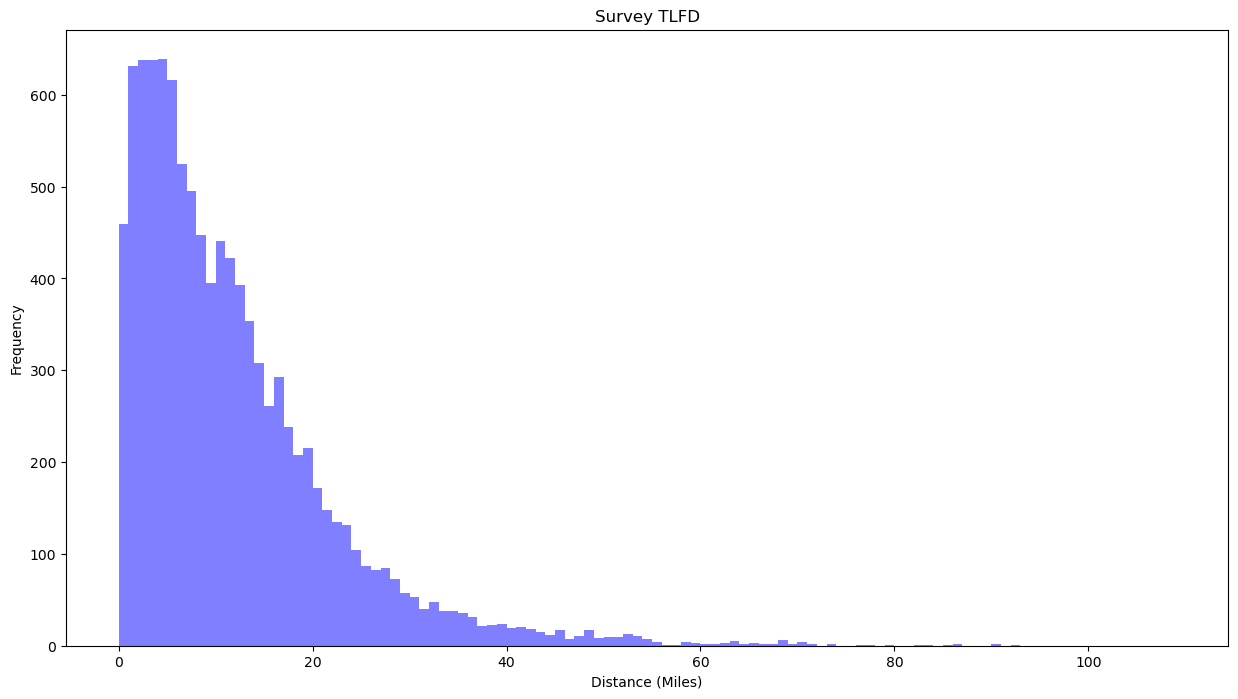

In [75]:
num_bins = 100
plt.figure(figsize=(15, 8))
#bin_seq = list(range(75))
#bin_seq.append(125)
n, bins, patches = plt.hist(dist_check[dist_check['work_from_home'] == 0]['survey_distance'], 
                            bins=list(range(int(max(dist_check['survey_distance'])))), facecolor='blue', alpha=0.5)
plt.title('Survey TLFD')
plt.xlabel('Distance (Miles)')
plt.ylabel('Frequency')

In [76]:
work_co

,person_id,model_choice,override_choice,income_segment,home_zone_id,home_state,is_student,pemploy,auto_ownership,home_dist
0,7,1705,2931.0,5,2931,55,False,2,1,27
1,10,1595,2652.0,4,2651,27,False,2,2,20
2,11,2840,2653.0,4,2651,27,False,1,2,20
3,14,846,1326.0,5,2666,27,False,1,2,20
4,15,1227,-1.0,5,2666,27,False,1,2,20
...,...,...,...,...,...,...,...,...,...,...
39362,79998,1215,1284.0,5,1931,27,False,1,2,6
39363,79999,2809,2078.0,5,1931,27,False,1,2,6
39364,80001,1670,1121.0,5,1107,27,False,1,2,3
39365,80002,549,1052.0,5,1107,27,False,1,2,3


In [77]:
orig_taz = work_ca.columns.tolist()[2:]
orig_taz = [int(i) for i in orig_taz]
seq_taz = list(range(1,len(orig_taz)+1))

taz_xwalk = pd.DataFrame(list(zip(orig_taz, seq_taz)),
               columns =['survey_choice', 'survey_choice_seq'])


In [78]:
asim_per_df

,person_id,household_id,per_num,age,SEX,pemploy,pstudent,is_student,ptype,school_zone_id,workplace_zone_id,free_parking_at_work,work_from_home,telecommute_frequency,day,educ,transit_pass_subsidy,transit_pass_ownership,HH_ID,PER_ID,cdap_activity,mandatory_tour_frequency,_escort,_shopping,_othmaint,_othdiscr,_eatout,_social,non_mandatory_tour_frequency,age_0_to_5,age_6_to_12,age_16_to_19,age_16_p,adult,male,female,has_non_worker,has_retiree,has_preschool_kid,has_driving_kid,has_school_kid,has_full_time,has_part_time,has_university,student_is_employed,nonstudent_to_school,is_gradeschool,is_highschool,is_university,school_segment,is_worker,home_zone_id,PNUM,is_fulltime_worker,is_parttime_worker,time_factor_work,time_factor_nonwork,value_of_time,income_segment,is_income_less25K,is_income_25K_to_60K,is_income_60K_to_120K,is_income_greater60K,is_income_greater120K,is_non_worker_in_HH,is_all_adults_full_time_workers,is_pre_drive_child_in_HH,has_young_children,has_children_6_to_12,income,income_in_thousands,hh_child,home_state,home_county,home_dist,is_out_of_home_worker,workplace_location_logsum,distance_to_work,workplace_in_cbd,workplace_in_suburb,work_zone_area_type,roundtrip_auto_time_to_work,work_auto_savings,work_auto_savings_ratio,work_park_cost,non_toll_time_work,toll_time_work,toll_dist_work,toll_cost_work,toll_travel_time_savings_work
0,1,1,1,42,1,3,3,False,4,-1.0,-1,False,False,No_Telecommute,1,13,0,0,18114244,1,N,NaN,0,1,0,0,0,0,16,False,False,False,True,True,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,0,False,1191,1,False,False,0.407362,0.648903,4.206907,1,True,False,False,False,False,True,False,True,False,True,167.24,0.16724,4,27,Hennepin,1,False,NaN,NaN,False,False,NaN,0.00,0.00000,0.000000,0.0,0.00,0.00,0.00,0.0,0.0
1,2,1,2,42,2,3,2,True,3,-1.0,-1,False,False,No_Telecommute,1,13,0,0,18114244,2,N,NaN,0,0,0,1,0,0,1,False,False,False,True,True,False,True,True,False,False,True,True,False,False,False,False,False,False,False,True,3,False,1191,2,False,False,0.279769,0.612654,4.206907,1,True,False,False,False,False,True,False,True,False,True,167.24,0.16724,4,27,Hennepin,1,False,NaN,NaN,False,False,NaN,0.00,0.00000,0.000000,0.0,0.00,0.00,0.00,0.0,0.0
2,3,1,3,17,2,3,1,True,6,-1.0,-1,False,False,No_Telecommute,1,0,0,0,18114244,3,H,NaN,0,0,0,0,0,0,0,False,False,True,True,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True,False,2,False,1191,3,False,False,0.412113,1.453034,4.206907,1,True,False,False,False,False,True,False,True,False,True,167.24,0.16724,4,27,Hennepin,1,False,NaN,NaN,False,False,NaN,0.00,0.00000,0.000000,0.0,0.00,0.00,0.00,0.0,0.0
3,4,1,4,11,2,4,1,True,7,-1.0,-1,False,False,No_Telecommute,1,0,0,0,18114244,4,H,NaN,0,0,0,0,0,0,0,False,True,False,False,False,False,True,True,False,False,True,True,False,False,True,False,False,True,False,False,1,False,1191,4,False,False,0.759176,0.316427,4.206907,1,True,False,False,False,False,True,False,True,False,True,167.24,0.16724,4,27,Hennepin,1,False,NaN,NaN,False,False,NaN,0.00,0.00000,0.000000,0.0,0.00,0.00,0.00,0.0,0.0
4,5,1,5,7,1,4,1,True,7,-1.0,-1,False,False,No_Telecommute,1,0,0,0,18114244,5,H,NaN,0,0,0,0,0,0,0,False,True,False,False,False,True,False,True,False,False,True,True,False,False,True,False,False,True,False,False,1,False,1191,5,False,False,1.437325,1.281885,4.206907,1,True,False,False,False,False,True,False,True,False,True,167.24,0.16724,4,27,Hennepin,1,False,NaN,NaN,False,False,NaN,0.00,0.00000,0.000000,0.0,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80001,80002,41379,2,39,2,1,3,False,1,-1.0,1052,False,False,No_Telecommute,4,13,0,0,22002789,2,M,work1,0,0,0,0,

In [79]:
worker_checks = work_co.merge(asim_per_df[['person_id', 'age', 'ptype']], how = 'left', on = 'person_id')

pd.crosstab(worker_checks.ptype, worker_checks.pemploy)

pemploy,1,2
ptype,,
1,33029,0
2,0,5010
3,29,845
6,0,454


In [80]:
worker_checks['age_bin'] = pd.cut(worker_checks.age, [0, 16, 18, 65, np.inf], ['u16', '16-18', '18-65', 'ret'])
worker_checks['age_bin'].value_counts().sort_index()

(0.0, 16.0]       212
(16.0, 18.0]      545
(18.0, 65.0]    36756
(65.0, inf]      1854
Name: age_bin, dtype: int64

In [171]:
landuse

,zone_id,ZONEID,POPULATION,HOUSEHOLDS,RET_EMP,NRET_EMP,AMC_EMP,MAN_EMP,OFF_EMP,MED1_EMP,MED2_EMP,RST_EMP,K12_EMP,ENT_EMP,TOT_EMP,ZONE_y,ZONE_y.1,ZONE_y_1,AREA,MIX_DENS,TERM_TIME,PARK_COST,NONWRKPRK,ENROLLED,ENROLLED2,ENROLLED5,ENROLLED10,TETRACC15,TEHWYACC10,REHWYACC10,NEHWYACC10,MEHWYACC10,EXT_DIST,CBD,SUBURB3,SUBURB2,RURAL,HHDENSITY,LOGMXDENS,RETEMPDEN,POPDENS,TOTEMPDEN,TRHWACCRAT,TW_ACC,SCH1NUM1,SCH1NUM2,SCH1NUM3,SCH1NUM4,SCH1NUM5,SCH1NUM6,SCH1NUM7,SCH1NUM8,SCH1NUM9,SCH1NUM10,SCH2NUM1,SCH2NUM2,SCH2NUM3,SCH2NUM4,SCH2NUM5,SCH2NUM6,SCH2NUM7,SCH2NUM8,SCH2NUM9,SCH2NUM10,SCH3NUM1,SCH3NUM2,SCH3NUM3,SCH3NUM4,SCH3NUM5,SCH3NUM6,SCH3NUM7,SCH3NUM8,SCH3NUM9,SCH3NUM10,DISTRICT,area_type,K_8,G9_12,COUNTY,STATEFP,ML_DIST,household_density,employment_density,density_index
0,1,1,85,32,0,3,3,0,0,0,0,0,0,0,3,1,1,1,5.45117,0.00000,1,0,0,0,0,0,0,0.0,5.843916,4.270736,5.615147,0.029840,17.29,0,0,0,1,5.870299,0.000000,0.000000,15.592983,0.000000,2.55075,1,6,86,136,0,0,0,0,0,0,0,6,7,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,14,4,0,0,Anoka,27,28.475000,0.009172,0.000860,0.000008
1,2,2,534,169,0,397,44,2,351,0,0,0,0,0,397,2,2,2,3.28617,0.00000,1,0,0,0,0,0,0,0.0,6.695728,5.080955,6.475455,0.054068,14.10,0,0,0,1,51.427650,0.000000,0.000000,162.499201,46.558760,2.18668,1,6,86,136,0,0,0,0,0,0,0,6,7,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,14,4,69,145,Anoka,27,26.629999,0.080356,0.188765,0.015168
2,3,3,151,51,8,8,8,0,0,0,0,0,0,0,16,3,3,3,2.70788,0.00000,1,0,0,0,0,0,0,0.0,6.480769,4.861809,6.261901,0.051695,15.37,0,0,0,1,18.833922,1.268004,2.954341,55.763180,4.062218,2.27203,1,6,86,136,0,0,0,0,0,0,0,6,7,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,14,4,0,0,Anoka,27,26.989000,0.029428,0.009232,0.000272
3,4,4,1076,338,0,15,4,0,11,0,0,0,0,0,15,4,4,4,1.42696,6.13967,1,0,0,0,0,0,0,0.0,6.946256,5.419451,6.702570,0.073260,13.38,0,0,0,1,236.867186,2.563135,12.614229,754.050569,18.220553,2.10348,1,6,86,136,0,0,0,0,0,0,0,6,7,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,14,4,0,0,Anoka,27,25.908001,0.370105,0.016425,0.006079
4,5,5,1147,456,259,84,12,0,71,0,0,0,0,0,343,5,5,5,0.45307,174.21885,2,0,0,0,0,0,0,0.0,7.104821,5.622231,6.848343,0.095505,12.44,0,0,1,0,1006.466992,5.857782,534.133798,2531.617631,734.985764,2.05334,1,6,86,136,0,0,0,0,0,0,0,6,7,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,14,3,0,0,Anoka,27,24.972000,1.572605,1.182902,0.675098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,3026,3026,28,10,8,0,0,0,0,0,0,0,0,0,8,3026,3026,3026,0.44770,0.00000,1,0,0,0,0,0,0,0.0,7.116064,5.434860,6.911083,0.000018,9.97,0,0,0,1,22.336386,0.000000,0.000000,62.541881,24.570025,2.02661,1,3025,0,0,0,0,0,0,0,0,0,3025,0,0,0,0,0,0,0,0,0,3025,0,0,0,0,0,0,0,0,0,26,4,0,0,Polk,55,49.252998,0.034901,0.027920,0.000974
3026,3027,3027,147,51,165,57,0,33,24,0,0,0,0,0,222,3027,3027,3027,0.32332,111.76897,1,0,0,0,0,0,0,0.0,7.172436,5.535310,6.957049,0.000019,9.91,0,0,0,1,157.738463,4.780044,470.122479,454.657924,1382.531238,2.00875,1,3025,0,0,0,0,0,0,0,0,0,3025,0,0,0,0,0,0,0,0,0,3025,0,0,0,0,0,0,0,0,0,26,4,0,0,Polk,55,49.199001,0.246466,1.072854,0.200423
3027,3028,3028,630,286,83,1415,2,644,769,0,0,0,0,0,1498,3028,3028,3028,0.77765,0.00000,1,0,0,0,0,0,0,0.0,7.360892,5.437730,7.203643,0.000013,8.43,0,0,0,1,367.774706,4.084484,69.439979,810.133093,1588.118048,1.95298,1,3025,0,0,0,0,0,0,0,0,0,3025,0,0,0,0,0,0,0,0,0,3025,0,0,0,0,0,0,0,0,0,26,4,1064,462,Polk,55,50.587002,0.574648,3.009869,0.482524
3028,3029,3029,837,255,0,21,1,16,4,0,0,0,0,0,21,3029,3029,3029,14.80920,0.00000,1,0,0,0,0,0,0,0.0,6.006979,4.237195,5.823167,0.000100,20.54,0,0,0,1,17.219026,0.000000,0.000000,56.518921,1.350512,2.43710,1,3008,2981,0,0,0,0,0,0,0,0,2981,0,0,0,0,0,0,0,0,0,2981,0,0,0,0,0,0,0,0,0,26,4,0,0,Polk,55,44.220001,0.026905,0.002216,0.000060


In [172]:
# prepare landuse for work location choice estimation in ALOGIT
work_lu_columns = ['zone_id', 'STATEFP', 'DISTRICT', 'AMC_EMP', 'MAN_EMP', 'OFF_EMP', 'RET_EMP', 'TOT_EMP', 'CBD', 'density_index']

# work_landuse_alogit = landuse[landuse['TOT_EMP']>0][work_lu_columns]
#BUG: The CA table is not outputting all zones, so build the land use file based on what is available
work_landuse_alogit = landuse[landuse['zone_id'].isin(work_ca.columns[2:].astype(int))][work_lu_columns]
work_landuse_alogit

,zone_id,STATEFP,DISTRICT,AMC_EMP,MAN_EMP,OFF_EMP,RET_EMP,TOT_EMP,CBD,density_index
0,1,27,14,3,0,0,0,3,0,0.000008
1,2,27,14,44,2,351,0,397,0,0.015168
2,3,27,14,8,0,0,8,16,0,0.000272
3,4,27,14,4,0,11,0,15,0,0.006079
4,5,27,14,12,0,71,259,343,0,0.675098
...,...,...,...,...,...,...,...,...,...,...
3025,3026,55,26,0,0,0,8,8,0,0.000974
3026,3027,55,26,0,33,24,165,222,0,0.200423
3027,3028,55,26,2,644,769,83,1498,0,0.482524
3028,3029,55,26,1,16,4,0,21,0,0.000060


In [173]:
work_landuse_alogit = work_landuse_alogit.pivot_table(columns='zone_id')
work_landuse_alogit_cols = ['taz' + str(col) for col in work_landuse_alogit.columns]
work_landuse_alogit.columns = work_landuse_alogit_cols
work_landuse_alogit = work_landuse_alogit.reset_index().rename(columns={'index': 'landuse_var'})

#write out land use file variable names
work_landuse_alogit['landuse_var'].to_csv(os.path.join(output_folder, 
                                        'destination_choice', 
                                        'work_location_choice', 
                                        'work_landuse_variables_2.csv'), index=False)

#prepare landuse file in ALOGIT format
work_landuse_alogit = work_landuse_alogit.drop(columns='landuse_var')
work_landuse_alogit

,taz1,taz2,taz3,taz4,taz5,taz6,taz7,taz8,taz9,taz10,taz11,taz12,taz13,taz14,taz15,taz16,taz17,taz18,taz19,taz20,taz21,taz22,taz23,taz24,taz25,taz26,taz27,taz28,taz29,taz30,taz31,taz32,taz33,taz34,taz35,taz36,taz37,taz38,taz39,taz40,taz41,taz42,taz43,taz44,taz45,taz46,taz47,taz48,taz49,taz50,taz51,taz52,taz53,taz54,taz55,taz56,taz57,taz59,taz60,taz61,taz62,taz63,taz64,taz65,taz66,taz67,taz68,taz69,taz70,taz71,taz72,taz73,taz74,taz75,taz76,taz77,taz78,taz79,taz80,taz81,taz82,taz83,taz84,taz85,taz86,taz87,taz88,taz89,taz90,taz91,taz92,taz93,taz94,taz95,taz96,taz97,taz98,taz99,taz100,taz101,taz102,taz103,taz104,taz105,taz106,taz107,taz108,taz109,taz110,taz111,taz112,taz113,taz114,taz115,taz116,taz117,taz118,taz119,taz120,taz121,taz122,taz123,taz124,taz125,taz126,...,taz2904,taz2905,taz2906,taz2907,taz2908,taz2909,taz2910,taz2911,taz2912,taz2913,taz2914,taz2915,taz2916,taz2917,taz2918,taz2919,taz2920,taz2921,taz2922,taz2923,taz2924,taz2925,taz2926,taz2927,taz2928,taz2929,taz2930,taz2931,taz2932,taz2933,taz2934,taz2935,taz2936,taz2937,taz2938,taz2939,taz2940,taz2941,taz2942,taz2943,taz2944,taz2945,taz2946,taz2947,taz2948,taz2949,taz2950,taz2951,taz2952,taz2953,taz2954,taz2956,taz2957,taz2958,taz2959,taz2960,taz2961,taz2962,taz2963,taz2964,taz2965,taz2966,taz2967,taz2968,taz2969,taz2970,taz2971,taz2972,taz2973,taz2974,taz2975,taz2976,taz2977,taz2978,taz2979,taz2980,taz2981,taz2982,taz2983,taz2984,taz2985,taz2986,taz2987,taz2988,taz2989,taz2990,taz2991,taz2992,taz2993,taz2994,taz2995,taz2996,taz2997,taz2998,taz3000,taz3001,taz3002,taz3003,taz3004,taz3005,taz3006,taz3007,taz3008,taz3009,taz3010,taz3011,taz3012,taz3013,taz3014,taz3015,taz3016,taz3017,taz3018,taz3019,taz3020,taz3021,taz3022,taz3023,taz3024,taz3025,taz3026,taz3027,taz3028,taz3029,taz3030
0,3.000000,44.000000,8.000000,4.000000,12.000000,9.000000,24.000000,9.000000,28.000000,0.00000,45.00000,5.000000,0.000000,32.000000,16.000000,1.00000,65.00000,23.000000,12.00000,10.000000,12.00000,10.000000,25.000000,13.00000,12.000000,5.000000,0.000000,0.000000,1.000000,13.000000,0.00000,10.000000,222.000000,80.00000,77.000000,19.000000,32.000000,18.000000,5.00000,217.00000,9.000000,33.000000,100.000000,7.000000,0.000000,18.000000,13.000000,4.000000,31.000000,24.000000,23.000000,0.000000,130.00000,5.000000,3.00000,3.000000,0.000000,1.000000,71.000000,0.0,3.000000,1.000000,256.000000,33.000000,433.0,157.0,8.00000,4.000000,3.000000,39.0000,61.000000,0.000000,3.000000,0.000000,5.000000,23.000000,12.000000,5.000000,11.000000,0.000000,15.000000,18.000000,172.000000,72.00000,19.000000,177.000000,17.000000,15.000000,6.000000,13.00000,0.000000,30.000000,0.000000,8.000000,8.000000,27.000000,60.000000,35.000000,4.000000,17.000000,3.000000,101.000000,91.000000,9.000000,8.000000,38.000000,12.000000,172.0,0.000000,40.000000,258.00000,186.000000,220.000000,149.00000,21.000000,1.000000,262.000000,27.000000,82.000000,79.000000,4.00000,15.000000,13.000000,22.00000,3.000000,...,0.00000,7.000000,6.000000,137.000000,2.000000,24.000000,20.000000,13.000000,6.000000,52.000000,8.000000,21.000000,4.000000,2.000000,6.000000,0.000000,4.000000,9.00000,8.000000,42.000000,9.000000,3.000000,15.000000,12.000000,27.000000,81.000000,39.000000,1.000000,246.000000,131.000000,11.000000,75.000000,14.000000,17.00000,356.000000,13.000000,9.000000,20.000000,22.000000,114.00000,9.000000,4.000000,25.000000,0.000000,56.000000,33.000000,1.000000,21.000000,0.000000,8.000000,4.000000,24.000000,11.000000,0.000000,3.000000,4.00000,0.000000,142.000000,54.000000,33.000000,1.000000,0.000000,5.000000,23.000000,15.000000,31.000000,2.000000,42.000000,7.000000,11.000000,0.000000,28.000000,8.000000,116.000000,3.000000,0.000000,192.000000,94.000000,8.000000,3.000000,84.000000,76.000000,22.000000,4.000000,25.000000,14.00000,4.000000,15.00000,10.000000,0.000000,2.000000,11.000000,0.000000,15.000000,15.00000,5.000000,0.000000,15.000000,2.000000,11.000000,10.000000,0.000000,73.000000,33.000000,11.000000,16.000000,17.000000,9.000000,8.000000,22.0000

In [174]:
assert all(is_number(work_landuse_alogit.dtypes)), "Have Non-Numeric columns!"

In [84]:
#write out landuse file for work location choice estimation in ALOGIT
work_landuse_alogit.to_csv(os.path.join(output_folder, 
                                        'destination_choice', 
                                        'work_location_choice', 
                                        'work_landuse_alogit_2.csv'), index=False, header=False)

In [85]:
# remove persons with an invalid choice
workplace_tazs = work_landuse[work_landuse['TOT_EMP'] > 0]['zone_id']  
choosers = len(work_co)
work_co = work_co[work_co['override_choice'].isin(workplace_tazs)]
work_ca = work_ca[work_ca['person_id'].isin(work_co['person_id'])]
valid_choosers = len(work_co)

print("Number of people removed due to invalid choice: ", choosers - valid_choosers)
print("Number of valid choosers: ", valid_choosers)

Number of people removed due to invalid choice:  9932
Number of valid choosers:  29435


In [86]:
work_ca['variable'].value_counts()

mode_choice_logsum                   29435
util_mn_to_wi                        29435
util_wi_to_wi                        29435
util_wi_to_mn                        29435
util_utility_adjustment              29435
util_size_variable                   29435
util_sc_xing_2                       29435
util_sc_xing_1                       29435
util_sample_of_corrections_factor    29435
util_no_attractions                  29435
util_ms_xing_2                       29435
util_ms_xing_1                       29435
util_mode_logsum                     29435
util_mn_xing_2                       29435
util_mn_xing_1                       29435
util_mn_to_mn                        29435
pick_count                           29435
util_dist_vhigh                      29435
util_dist_student                    29435
util_dist_squared                    29435
util_dist_part_time                  29435
util_dist_med                        29435
util_dist_low                        29435
util_dist_l

In [87]:
work_ca[(work_ca['variable'] == 'util_dist') & (work_ca['person_id'] == 7)]

,person_id,variable,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913,2914,2915,2916,2917,2918,2919,2920,2921,2922,2923,2924,2925,2926,2927,2928,2929,2930,2931,2932,2933,2934,2935,2936,2937,2938,2939,2940,2941,2942,2943,2944,2945,2946,2947,2948,2949,2950,2951,2952,2953,2954,2956,2957,2958,2959,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,3000,3001,3002,3003,3004,3005,3006,3007,3008,3009,3010,3011,3012,3013,3014,3015,3016,3017,3018,3019,3020,3021,3022,3023,3024,3025,3026,3027,3028,3029,3030
6,7,util_dist,61.36000061035156,59.77000045776367,60.27000045776367,59.040000915527344,58.11000061035156,58.11000061035156,59.34000015258789,56.70000076293945,56.70000076293945,53.720001220703125,55.08000183105469,56.0099983215332,52.66999816894531,53.83000183105469,54.08000183105469,51.7599983215332,51.5,52.290000915527344,49.5,50.25,51.0099983215332,52.90999984741211,54.75,55.0099983215332,56.189998626708984,54.68000030517578,52.61000061035156,53.04999923706055,55.56999969482422,55.90999984741211,58.720001220703125,58.84000015258789,57.279998779296875,56.61000061035156,54.13999938964844,54.83000183105469,55.689998626708984,53.459999084472656,53.880001068115234,51.790000915527344,51.84000015258789,53.349998474121094,52.66999816894531,51.189998626708984,51.27000045776367,51.2400016784668,50.81999969482422,50.75,49.90999984741211,49.630001068115234,48.79999923706055,48.86000061035156,47.7400016784668,47.7400016784668,47.2599983215332,49.189998626708984,48.63999938964844,49.5099983215332,50.290000915527344,52.459999084472656,50.08000183105469,49.56999969482422,47.95000076293945,47.810001373291016,47.439998626708984,46.66999816894531,46.310001373291016,45.7599983215332,45.099998474121094,45.70000076293945,47.09000015258789,45.66999816894531,46.779998779296875,48.68000030517578,49.86000061035156,49.040000915527344,49.959999084472656,49.0,48.15999984741211,47.900001525878906,47.18000030517578,45.61000061035156,48.959999084472656,48.52000045776367,49.11000061035156,47.779998779296875,49.81999969482422,46.9900016784668,48.279998779296875,48.220001220703125,45.65999984741211,45.88999938964844,45.15999984741211,45.150001525878906,44.720001220703125,45.22999954223633,45.439998626708984,44.119998931884766,43.66999816894531,43.119998931884766,42.88999938964844,43.29999923706055,43.970001220703125,44.97999954223633,44.79999923706055,44.060001373291016,43.43000030517578,43.41999816894531,41.38999938964844,41.7400016784668,42.029998779296875,43.25,44.599998474121094,45.880001068115234,47.40999984741211,48.66999816894531,46.54999923706055,44.900001525878906,43.849998474121094,41.650001525878906,41.91999816894531,43.290000915527344,42.779998779296875,...,20.780000686645508,16.399999618530273,15.220000267028809,14.890000343322754,16.969999313354492,17.670000076293945,19.110000610351562,18.559999465942383,18.350000381469727,18.84000015258789,24.739999771118164,31.06999969482422,39.560001373291016,36.56999969482422,34.459999084472656,28.229999542236328,28.809999465942383,25.8700008392334,24.239999771118164,20.75,19.760000228881836,6.0,4.360000133514404,4.360000133514404,3.299999952316284,3.4700000286102295,2.509999990463257,0.699999988079071,2.380000114440918,2.200000047683716,5.860000133514404,6.46999979019165,6.329999923706055,3.8499999046325684,5.289999961853027,2.1600000858306885,1.409999966621399,6.329999923706055,5.5,14.779999732971191,14.800000190734863,11.5600004196167,10.050000190734863,12.859999656677246,12.640000343322754

In [88]:
work_ca[(work_ca['variable'] == 'util_dist') & (work_ca['person_id'] == 10)]

,person_id,variable,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913,2914,2915,2916,2917,2918,2919,2920,2921,2922,2923,2924,2925,2926,2927,2928,2929,2930,2931,2932,2933,2934,2935,2936,2937,2938,2939,2940,2941,2942,2943,2944,2945,2946,2947,2948,2949,2950,2951,2952,2953,2954,2956,2957,2958,2959,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,3000,3001,3002,3003,3004,3005,3006,3007,3008,3009,3010,3011,3012,3013,3014,3015,3016,3017,3018,3019,3020,3021,3022,3023,3024,3025,3026,3027,3028,3029,3030
37,10,util_dist,41.5,44.060001373291016,42.119998931884766,43.04999923706055,45.5,45.43000030517578,48.52000045776367,49.869998931884766,48.5099983215332,49.540000915527344,48.0099983215332,47.22999954223633,49.16999816894531,47.45000076293945,45.290000915527344,44.68000030517578,45.869998931884766,47.88999938964844,46.61000061035156,45.290000915527344,42.540000915527344,42.04999923706055,45.959999084472656,42.97999954223633,44.150001525878906,42.650001525878906,40.36000061035156,38.95000076293945,41.459999084472656,41.810001373291016,40.36000061035156,38.20000076293945,35.54999923706055,37.470001220703125,36.91999816894531,34.2400016784668,33.58000183105469,33.939998626708984,34.06999969482422,37.68000030517578,38.27000045776367,35.220001220703125,33.58000183105469,36.58000183105469,36.68000030517578,37.4900016784668,39.29999923706055,39.22999954223633,40.15999984741211,37.59000015258789,39.43000030517578,40.119998931884766,40.29999923706055,40.29999923706055,38.77000045776367,38.7599983215332,37.41999816894531,35.75,34.529998779296875,33.380001068115234,34.38999938964844,35.810001373291016,36.68000030517578,36.540000915527344,37.279998779296875,38.470001220703125,38.130001068115234,35.119998931884766,35.220001220703125,36.38999938964844,38.939998626708984,36.36000061035156,38.650001525878906,40.540000915527344,40.599998474121094,40.939998626708984,42.709999084472656,42.369998931884766,40.61000061035156,41.880001068115234,39.040000915527344,39.59000015258789,42.93000030517578,42.4900016784668,43.09000015258789,43.93000030517578,46.9900016784668,44.130001068115234,46.16999816894531,46.11000061035156,44.279998779296875,43.38999938964844,43.47999954223633,42.650001525878906,41.130001068115234,37.08000183105469,37.279998779296875,38.099998474121094,39.630001068115234,39.06999969482422,39.79999923706055,39.970001220703125,40.15999984741211,40.31999969482422,42.29999923706055,41.560001373291016,42.470001220703125,42.459999084472656,41.130001068115234,40.63999938964844,44.08000183105469,44.79999923706055,45.720001220703125,46.779998779296875,47.52000045776367,49.900001525878906,47.709999084472656,46.060001373291016,45.0099983215332,42.810001373291016,43.08000183105469,44.45000076293945,43.939998626708984,...,73.72000122070312,74.8499984741211,74.72000122070312,75.80999755859375,77.86000061035156,77.06999969482422,78.5199966430664,76.08000183105469,75.11000061035156,76.36000061035156,86.70999908447266,89.6500015258789,104.72000122070312,102.62999725341797,91.9800033569336,85.73999786376953,86.31999969482422,83.38999938964844,79.22000122070312,74.48999786376953,73.5,65.54000091552734,68.1500015258789,68.16000366210938,67.0999984741211,66.44999694824219,67.33999633789062,67.68000030517578,65.95999908447266,68.26000213623047,71.93000030517578,72.52999877929688,72.4000015258789,69.91999816894531,72.33000183105469,69.2300033569336,68.26000213623047,73.37999725341797,72.55000305175781,81.05000305175781,80.86000061035156,77.62

In [89]:
work_ca

,person_id,variable,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913,2914,2915,2916,2917,2918,2919,2920,2921,2922,2923,2924,2925,2926,2927,2928,2929,2930,2931,2932,2933,2934,2935,2936,2937,2938,2939,2940,2941,2942,2943,2944,2945,2946,2947,2948,2949,2950,2951,2952,2953,2954,2956,2957,2958,2959,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,3000,3001,3002,3003,3004,3005,3006,3007,3008,3009,3010,3011,3012,3013,3014,3015,3016,3017,3018,3019,3020,3021,3022,3023,3024,3025,3026,3027,3028,3029,3030
0,7,mode_choice_logsum,-3.400123694808752,-3.1026865120152998,-3.175070929629568,-3.022576218759899,-2.9729715976863167,-2.968626549033869,-3.119854016289,-2.8264064990700812,-2.8250447336031854,-2.627498443033108,-2.7704502219662364,-2.7895115356630025,-2.560900417625575,-2.6816948660604543,-2.695844003375295,-2.53186604310732,-2.508400324281667,-2.560553360174605,-2.303594559638624,-2.4157829939314484,-2.429074634149221,-2.5441510386160906,-2.6571329772919228,-2.7271304128905203,-2.8681991556106743,-2.698075161102715,-2.4595936521727073,-2.4999093025319308,-2.7000949463153274,-2.7545227148958977,-3.12054845354372,-3.1290943213964604,-2.9663940766875743,-2.940437494489745,-2.670010366859175,-2.659823619208244,-2.707256658526349,-2.467426572023965,-2.5876055823723503,-2.430411149816307,-2.4135515706331145,-2.5082651638250097,-2.4264578502172913,-2.3100523660052636,-2.3777664330106796,-2.4352339035323873,-2.3567838283687155,-2.3993150591460464,-2.3200608711919894,-2.3337727675802205,-2.2385194070944627,-2.248385295278632,-2.1492394884091843,-2.1607412874978986,-2.124100871429614,-2.2917357730814922,-2.1980742222839837,-2.23676418226159,-2.28517824199983,-2.3836487927559005,-2.2014576115305937,-2.2462915732410567,-2.125031947085164,-2.10393157989412,-2.0856421507153544,-2.0483859924704784,-1.9942756821152532,-1.9725782340904587,-1.8997328592048313,-1.9791958783232917,-2.0921000871652877,-1.9737547008116676,-2.084071884603578,-2.2380644629372246,-2.2723326660747554,-2.2079753502614703,-2.318846922147762,-2.2472482075407707,-2.2337857923366573,-2.1846405211993627,-2.1412696503631876,-2.034643661096333,-2.3239257404523395,-2.254503371565453,-2.264941147821746,-2.2551944006628766,-2.3714772798659154,-2.1861063111742896,-2.2368310562094402,-2.2803942857301687,-2.1541976569886523,-2.114382770788513,-2.135330593349473,-2.065987176120187,-2.0111227225529675,-1.941878761105954,-1.9745551934116368,-1.9050541588313925,-1.9127599202128636,-1.841530882013186,-1.8652845172767014,-1.8950984393136792,-1.9342895533192423,-2.0485750985079227,-2.011873887396837,-1.9496083933529713,-1.9640285285439965,-1.9626658525032952,-1.8570824611925503,-1.8193321938679874,-1.8649424482896568,-1.9618211592502253,-1.9847498714061935,-2.070859550816173,-2.1571980563097757,-2.295376956569284,-2.1851539413365026,-2.148751553040873,-2.045945293532994,-1.838196588097425,-1.8847936634017344,-1.985884442315892,-1.905905072423477,...,-0.5249311947262457,-0.4169354830382215,-0.29022176874581845,-0.2719704001065123,-0.48416565325618155,-0.5223960123122441,-0.6490012335456626,-0.5821321134187293,-0.6043055994834854,-0.6260673442329212,-0.6929083954485659,-1.0693729291670429,-1.6130547453109463,-1.2928061560589534,-1.9752872086398594,-1.5085986915367537,-1.3553294768088637,-1.23258538546646,-1.0534251139094193,-0.6651391851587415,-0.6560980745559389,0.5382578878629058,0.6235338876628965,0.6222408593343997,0.7151746665691415,0.7475099602539917,0.770485336847188

In [90]:
work_ca_dist = work_ca[work_ca['variable'] == 'util_dist'].drop(columns='variable').set_index('person_id')
dist_cols = ['taz' + col + '_dist' for col in work_ca_dist.columns]
work_ca_dist.columns = dist_cols

work_ca_logsum = work_ca[work_ca['variable'] == 'mode_choice_logsum'].drop(columns='variable').set_index('person_id')
logsum_cols = ['taz' + col + '_logsum' for col in work_ca_logsum.columns]
work_ca_logsum.columns = logsum_cols

work_ca_xstate = work_ca[work_ca['variable'] == 'util_stay_in_state'].drop(columns='variable').set_index('person_id').astype(bool).astype(np.uint8)
work_ca_xstate_cols = ['taz' + col + '_statex' for col in work_ca_xstate.columns]
work_ca_xstate.columns = work_ca_xstate_cols

work_ca_alogit = pd.merge(work_ca_dist, work_ca_logsum, on='person_id') #.merge(work_ca_xstate, on = 'person_id')
work_ca_alogit


,taz1_dist,taz2_dist,taz3_dist,taz4_dist,taz5_dist,taz6_dist,taz7_dist,taz8_dist,taz9_dist,taz10_dist,taz11_dist,taz12_dist,taz13_dist,taz14_dist,taz15_dist,taz16_dist,taz17_dist,taz18_dist,taz19_dist,taz20_dist,taz21_dist,taz22_dist,taz23_dist,taz24_dist,taz25_dist,taz26_dist,taz27_dist,taz28_dist,taz29_dist,taz30_dist,taz31_dist,taz32_dist,taz33_dist,taz34_dist,taz35_dist,taz36_dist,taz37_dist,taz38_dist,taz39_dist,taz40_dist,taz41_dist,taz42_dist,taz43_dist,taz44_dist,taz45_dist,taz46_dist,taz47_dist,taz48_dist,taz49_dist,taz50_dist,taz51_dist,taz52_dist,taz53_dist,taz54_dist,taz55_dist,taz56_dist,taz57_dist,taz59_dist,taz60_dist,taz61_dist,taz62_dist,taz63_dist,taz64_dist,taz65_dist,taz66_dist,taz67_dist,taz68_dist,taz69_dist,taz70_dist,taz71_dist,taz72_dist,taz73_dist,taz74_dist,taz75_dist,taz76_dist,taz77_dist,taz78_dist,taz79_dist,taz80_dist,taz81_dist,taz82_dist,taz83_dist,taz84_dist,taz85_dist,taz86_dist,taz87_dist,taz88_dist,taz89_dist,taz90_dist,taz91_dist,taz92_dist,taz93_dist,taz94_dist,taz95_dist,taz96_dist,taz97_dist,taz98_dist,taz99_dist,taz100_dist,taz101_dist,taz102_dist,taz103_dist,taz104_dist,taz105_dist,taz106_dist,taz107_dist,taz108_dist,taz109_dist,taz110_dist,taz111_dist,taz112_dist,taz113_dist,taz114_dist,taz115_dist,taz116_dist,taz117_dist,taz118_dist,taz119_dist,taz120_dist,taz121_dist,taz122_dist,taz123_dist,taz124_dist,taz125_dist,taz126_dist,...,taz2904_logsum,taz2905_logsum,taz2906_logsum,taz2907_logsum,taz2908_logsum,taz2909_logsum,taz2910_logsum,taz2911_logsum,taz2912_logsum,taz2913_logsum,taz2914_logsum,taz2915_logsum,taz2916_logsum,taz2917_logsum,taz2918_logsum,taz2919_logsum,taz2920_logsum,taz2921_logsum,taz2922_logsum,taz2923_logsum,taz2924_logsum,taz2925_logsum,taz2926_logsum,taz2927_logsum,taz2928_logsum,taz2929_logsum,taz2930_logsum,taz2931_logsum,taz2932_logsum,taz2933_logsum,taz2934_logsum,taz2935_logsum,taz2936_logsum,taz2937_logsum,taz2938_logsum,taz2939_logsum,taz2940_logsum,taz2941_logsum,taz2942_logsum,taz2943_logsum,taz2944_logsum,taz2945_logsum,taz2946_logsum,taz2947_logsum,taz2948_logsum,taz2949_logsum,taz2950_logsum,taz2951_logsum,taz2952_logsum,taz2953_logsum,taz2954_logsum,taz2956_logsum,taz2957_logsum,taz2958_logsum,taz2959_logsum,taz2960_logsum,taz2961_logsum,taz2962_logsum,taz2963_logsum,taz2964_logsum,taz2965_logsum,taz2966_logsum,taz2967_logsum,taz2968_logsum,taz2969_logsum,taz2970_logsum,taz2971_logsum,taz2972_logsum,taz2973_logsum,taz2974_logsum,taz2975_logsum,taz2976_logsum,taz2977_logsum,taz2978_logsum,taz2979_logsum,taz2980_logsum,taz2981_logsum,taz2982_logsum,taz2983_logsum,taz2984_logsum,taz2985_logsum,taz2986_logsum,taz2987_logsum,taz2988_logsum,taz2989_logsum,taz2990_logsum,taz2991_logsum,taz2992_logsum,taz2993_logsum,taz2994_logsum,taz2995_logsum,taz2996_logsum,taz2997_logsum,taz2998_logsum,taz3000_logsum,taz3001_logsum,taz3002_logsum,taz3003_logsum,taz3004_logsum,taz3005_logsum,taz3006_logsum,taz3007_logsum,taz3008_logsum,taz3009_logsum,taz3010_logsum,taz3011_logsum,taz3012_logsum,taz3013_logsum,taz3014_logsum,taz3015_logsum,taz3016_logsum,taz3017_logsum,taz3018_logsum,taz3019_logsum,taz3020_logsum,taz3021_logsum,taz3022_logsum,taz3023_logsum,taz3024_logsum,taz3025_logsum,taz3026_logsum,taz3027_logsum,taz3028_logsum,taz3029_logsum,taz3030_logsum
person_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,61.36000061035156,59.77000045776367,60.27000045776367,59.040000915527344,58.11000061035156,58.11000061035156,59.34000015258789,56.70000076293945,56.70000076293945,53.720001220703125,55.08000183105469,56.0099983215332,52.66999816894531,53.83000183105469,54.08000183105469,51.7599983215332,51.5,52.290000915527344,49.5,50.25,51.0099983215332,52.90999984741211,54.75,55.0099983215332,56.189998626708984,54.68000030517578,52.61000061035156,53.04999923706055,55.5699996

In [91]:
work_ca_alogit = pd.merge(work_ca_alogit, asim_per_hh_df, how='left', on='person_id')
work_co['survey_choice'] = work_co['override_choice']
work_ca_alogit = pd.merge(work_ca_alogit, work_co[['person_id', 'survey_choice']], how='left', on='person_id')
# recode survey choice as sequential TAZ
work_ca_alogit = pd.merge(work_ca_alogit, taz_xwalk[['survey_choice', 'survey_choice_seq']], how='left', on='survey_choice')
#replace all nulls with 999
work_ca_alogit.fillna(999, inplace=True)

C:\Users\andrew.rohne\AppData\Local\Temp\2\ipykernel_7072\2403177917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_co['survey_choice'] = work_co['override_choice']


In [92]:
for c in work_ca_alogit.columns:
    if c.lower().find("zone") >= 0:
        print(c)

school_zone_id
workplace_zone_id
home_zone_id_x
work_zone_area_type
home_zone_id_y


In [93]:
# The previous version of this used the Asim output of distance_to_work, which was based on the model location, not the survey location
work_ca_alogit['distance_to_work'] = work_ca_alogit.apply(lambda x: dist_skim[x.home_zone_id_x - 1, x.workplace_zone_id - 1], axis = 1)

In [94]:
work_ca_alogit['work_from_home'].value_counts()

1    19233
0    10202
Name: work_from_home, dtype: int64

In [96]:
work_ca_alogit[(work_ca_alogit['work_from_home']==0) & (work_ca_alogit['income']!=999)]['income'].describe()

count     10202.000000
mean     112854.363895
std       65932.727604
min          32.000000
25%       65207.780000
50%      102609.650000
75%      144627.000000
max      338820.330000
Name: income, dtype: float64

In [97]:
#distribution by income segments
work_ca_alogit[work_ca_alogit['work_from_home']==0]['income_segment_y'].value_counts().sort_index()

1     351
2     816
3    1680
4    7355
Name: income_segment_y, dtype: int64

In [98]:
# testing income segments <50, 50-100, 100-150, 150+
work_ca_alogit.loc[(work_ca_alogit['work_from_home']==0) & (work_ca_alogit['income']!=999), 'income_segment_y'] = pd.cut(work_ca_alogit['income'], bins=[-np.inf, 50000, 100000, 150000, np.inf], labels=[1, 2, 3, 4]).astype(int)
work_ca_alogit[work_ca_alogit['work_from_home']==0]['income_segment_y'].value_counts().sort_index()

1    1633
2    3257
3    2971
4    2341
Name: income_segment_y, dtype: int64

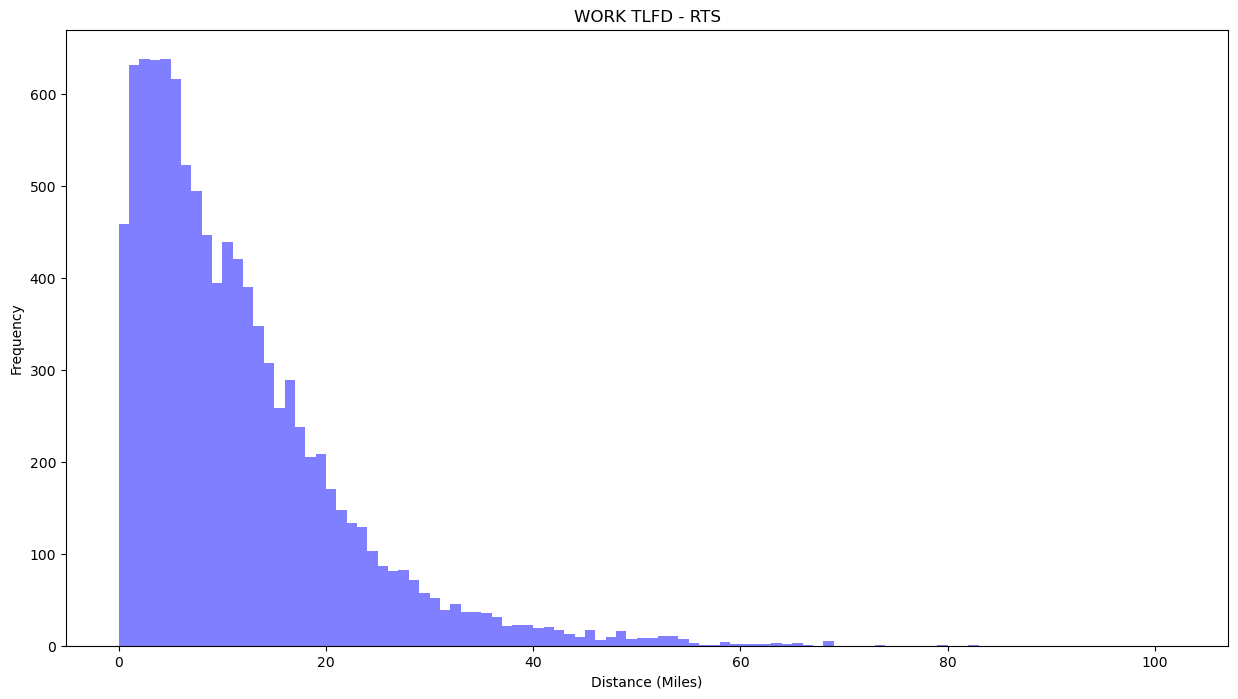

In [99]:
#TLFD for workers
num_bins = 100
plt.figure(figsize=(15, 8))
#bin_seq = list(range(75))
#bin_seq.append(125)
n, bins, patches = plt.hist(work_ca_alogit[work_ca_alogit['work_from_home']==0]['distance_to_work'], 
                            bins=list(range(int(max(work_ca_alogit['distance_to_work'])))), facecolor='blue', alpha=0.5)
plt.title('WORK TLFD - RTS')
plt.xlabel('Distance (Miles)')
plt.ylabel('Frequency')
plt.savefig(os.path.join(output_folder, 
                                        'destination_choice', 
                                        'work_location_choice', 
                                        'RTS_TLFD.png'))
plt.show()

In [100]:
print(f"The average trip length is {work_ca_alogit[work_ca_alogit['work_from_home']==0]['distance_to_work'].mean()}")

The average trip length is 11.565616545775338


In [101]:
print(f"There are {work_ca_alogit[(work_ca_alogit['work_from_home']==0) & (work_ca_alogit['distance_to_work'] == 0)].shape[0]} records with a zero-distance to work")

There are 0 records with a zero-distance to work


In [102]:
print(f"There are {work_ca_alogit[(work_ca_alogit['work_from_home']==0) & (work_ca_alogit['distance_to_work'] < 0)].shape[0]} records with a negative distance to work")

There are 0 records with a negative distance to work


In [103]:
print(f"There are {work_ca_alogit[(work_ca_alogit['work_from_home']==0) & (work_ca_alogit['distance_to_work'] >= 150)].shape[0]} records with more than 150 miles to work")

There are 0 records with more than 150 miles to work


In [104]:
sum(work_ca_alogit['work_from_home']==0)

10202

In [105]:
sum(work_ca_alogit[work_ca_alogit['work_from_home']==0]['distance_to_work']>=35 )

348

In [106]:
work_ca_alogit['pemploy'].value_counts()

1    25746
2     3689
Name: pemploy, dtype: int64

<Axes: >

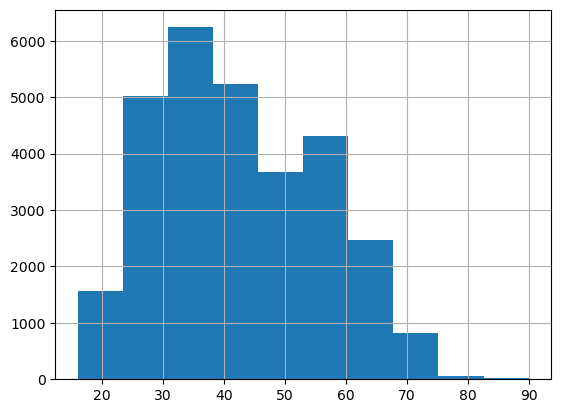

In [107]:
work_ca_alogit.age.hist()

In [108]:
asim_per_hh_df['income_segment_y'].value_counts().sort_index()

1    50554
2     2880
3     5027
4    21545
Name: income_segment_y, dtype: int64

In [109]:
work_ca_alogit

,person_id,taz1_dist,taz2_dist,taz3_dist,taz4_dist,taz5_dist,taz6_dist,taz7_dist,taz8_dist,taz9_dist,taz10_dist,taz11_dist,taz12_dist,taz13_dist,taz14_dist,taz15_dist,taz16_dist,taz17_dist,taz18_dist,taz19_dist,taz20_dist,taz21_dist,taz22_dist,taz23_dist,taz24_dist,taz25_dist,taz26_dist,taz27_dist,taz28_dist,taz29_dist,taz30_dist,taz31_dist,taz32_dist,taz33_dist,taz34_dist,taz35_dist,taz36_dist,taz37_dist,taz38_dist,taz39_dist,taz40_dist,taz41_dist,taz42_dist,taz43_dist,taz44_dist,taz45_dist,taz46_dist,taz47_dist,taz48_dist,taz49_dist,taz50_dist,taz51_dist,taz52_dist,taz53_dist,taz54_dist,taz55_dist,taz56_dist,taz57_dist,taz59_dist,taz60_dist,taz61_dist,taz62_dist,taz63_dist,taz64_dist,taz65_dist,taz66_dist,taz67_dist,taz68_dist,taz69_dist,taz70_dist,taz71_dist,taz72_dist,taz73_dist,taz74_dist,taz75_dist,taz76_dist,taz77_dist,taz78_dist,taz79_dist,taz80_dist,taz81_dist,taz82_dist,taz83_dist,taz84_dist,taz85_dist,taz86_dist,taz87_dist,taz88_dist,taz89_dist,taz90_dist,taz91_dist,taz92_dist,taz93_dist,taz94_dist,taz95_dist,taz96_dist,taz97_dist,taz98_dist,taz99_dist,taz100_dist,taz101_dist,taz102_dist,taz103_dist,taz104_dist,taz105_dist,taz106_dist,taz107_dist,taz108_dist,taz109_dist,taz110_dist,taz111_dist,taz112_dist,taz113_dist,taz114_dist,taz115_dist,taz116_dist,taz117_dist,taz118_dist,taz119_dist,taz120_dist,taz121_dist,taz122_dist,taz123_dist,taz124_dist,taz125_dist,...,_eatout,_social,non_mandatory_tour_frequency,age_0_to_5,age_6_to_12,age_16_to_19,age_16_p,adult,male,female,has_non_worker,has_retiree,has_preschool_kid,has_driving_kid,has_school_kid,has_full_time,has_part_time,has_university,student_is_employed,nonstudent_to_school,is_gradeschool,is_highschool,is_university,school_segment,is_worker,home_zone_id_x,PNUM,is_fulltime_worker,is_parttime_worker,time_factor_work,time_factor_nonwork,value_of_time,income_segment_x,is_income_less25K,is_income_25K_to_60K,is_income_60K_to_120K,is_income_greater60K,is_income_greater120K,is_non_worker_in_HH,is_all_adults_full_time_workers,is_pre_drive_child_in_HH,has_young_children,has_children_6_to_12,income_x,income_in_thousands_x,hh_child,home_state_x,home_dist_x,is_out_of_home_worker,workplace_location_logsum,distance_to_work,workplace_in_cbd,workplace_in_suburb,work_zone_area_type,roundtrip_auto_time_to_work,work_auto_savings,work_auto_savings_ratio,work_park_cost,non_toll_time_work,toll_time_work,toll_dist_work,toll_cost_work,toll_travel_time_savings_work,home_zone_id_y,income_y,hhsize,HHT,auto_ownership,num_workers,children,day_y,transponder_ownership,survey_year,day.1,HH_ID_y,chauf_id1,chauf_id2,child_id1,child_id2,child_id3,school_escorting_outbound,school_escorting_inbound,school_escorting_outbound_cond,joint_tour_frequency,joint_tour_frequency_composition,has_joint_tour,sample_rate,TYPE,income_in_thousands_y,income_segment_y,hinccat1,work_segment,median_value_of_time,hh_value_of_time,num_non_workers,type,num_drivers,num_adults,num_children,num_young_children,num_children_5_to_15,num_children_6_to_12,num_children_16_to_17,num_college_age,num_young_adults,non_family,family,home_is_urban,home_is_rural,TAZ,num_predrive_child,num_nonworker_adults,num_fullTime_workers,num_partTime_workers,retired_adults_only_hh,num_old_retirees,home_state_y,home_dist_y,hh_work_auto_savings_ratio,work_from_home,SEX,income,county,survey_choice,survey_choice_seq
0,7,61.36000061035156,59.77000045776367,60.27000045776367,59.040000915527344,58.11000061035156,58.11000061035156,59.34000015258789,56.70000076293945,56.70000076293945,53.720001220703125,55.08000183105469,56.0099983215332,52.66999816894531,53.83000183105469,54.08000183105469,51.7599983215332,51.5,52.290000915527344,49.5,50.25,51.0099983215332,52.90999984741211,54.75,55.0099983215332,56.189998626708984,54.68000030517578,52.61000061035156,53.04999923706055,55.56999969482422,55.90999984741211,58.720001220703125,58.84000015258789,57.279998779296875,56.61000061035156,54.13999938964844,54.83000183105469,55.689998626708984,53.459999084472656,53.880001

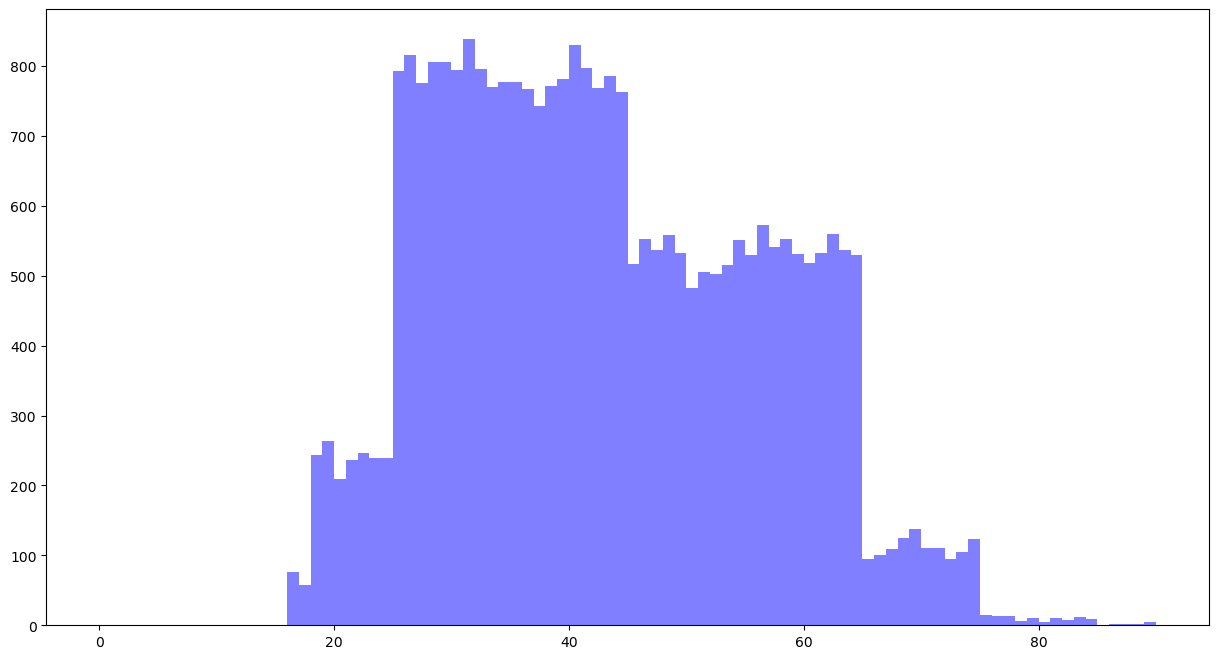

In [110]:
#Age distribution of workers
num_bins = 20
plt.figure(figsize=(15, 8))
#bin_seq = list(range(75))
#bin_seq.append(125)
n, bins, patches = plt.hist(work_ca_alogit['age'], bins=list(range(int(max(work_ca_alogit['age']))+1)), facecolor='blue', alpha=0.5)
plt.show()

In [111]:
asim_per_hh_df

,person_id,household_id,per_num,age,pemploy,pstudent,is_student,ptype,school_zone_id,workplace_zone_id,free_parking_at_work,telecommute_frequency,day_x,educ,transit_pass_subsidy,transit_pass_ownership,HH_ID_x,PER_ID,cdap_activity,mandatory_tour_frequency,_escort,_shopping,_othmaint,_othdiscr,_eatout,_social,non_mandatory_tour_frequency,age_0_to_5,age_6_to_12,age_16_to_19,age_16_p,adult,male,female,has_non_worker,has_retiree,has_preschool_kid,has_driving_kid,has_school_kid,has_full_time,has_part_time,has_university,student_is_employed,nonstudent_to_school,is_gradeschool,is_highschool,is_university,school_segment,is_worker,home_zone_id_x,PNUM,is_fulltime_worker,is_parttime_worker,time_factor_work,time_factor_nonwork,value_of_time,income_segment_x,is_income_less25K,is_income_25K_to_60K,is_income_60K_to_120K,is_income_greater60K,is_income_greater120K,is_non_worker_in_HH,is_all_adults_full_time_workers,is_pre_drive_child_in_HH,has_young_children,has_children_6_to_12,income_x,income_in_thousands_x,hh_child,home_state_x,home_dist_x,is_out_of_home_worker,workplace_location_logsum,distance_to_work,workplace_in_cbd,workplace_in_suburb,work_zone_area_type,roundtrip_auto_time_to_work,work_auto_savings,work_auto_savings_ratio,work_park_cost,non_toll_time_work,toll_time_work,toll_dist_work,toll_cost_work,toll_travel_time_savings_work,home_zone_id_y,income_y,hhsize,HHT,auto_ownership,num_workers,children,day_y,transponder_ownership,survey_year,day.1,HH_ID_y,chauf_id1,chauf_id2,child_id1,child_id2,child_id3,school_escorting_outbound,school_escorting_inbound,school_escorting_outbound_cond,joint_tour_frequency,joint_tour_frequency_composition,has_joint_tour,sample_rate,TYPE,income_in_thousands_y,income_segment_y,hinccat1,work_segment,median_value_of_time,hh_value_of_time,num_non_workers,type,num_drivers,num_adults,num_children,num_young_children,num_children_5_to_15,num_children_6_to_12,num_children_16_to_17,num_college_age,num_young_adults,non_family,family,home_is_urban,home_is_rural,TAZ,num_predrive_child,num_nonworker_adults,num_fullTime_workers,num_partTime_workers,retired_adults_only_hh,num_old_retirees,home_state_y,home_dist_y,hh_work_auto_savings_ratio,work_from_home,SEX,income,county
0,1,1,1,42,3,3,0,4,-1.0,-1,0,4,1,13,0,0,18114244,1,2,0,0,1,0,0,0,0,16,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1191,1,0,0,0.407362,0.648903,4.206907,1,1,0,0,0,0,1,0,1,0,1,167.24,0.16724,4,27,1,0,NaN,NaN,0,0,NaN,0.00,0.00000,0.000000,0.0,0.00,0.00,0.00,0.0,0.0,1191,167.24,6,1,0,0,4,1,0,2016,1,18114244,NaN,NaN,NaN,NaN,NaN,1,1,1,1,0,0,1,1,0.16724,1,1,1,6.01,4.206907,6,1,3,2,4,0,3,2,1,0,0,0,1,1,0,1191,1,1,0,0,0,0,27,1,0.000000,0,1.0,167.24,6
1,2,1,2,42,3,2,1,3,-1.0,-1,0,4,1,13,0,0,18114244,2,2,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,3,0,1191,2,0,0,0.279769,0.612654,4.206907,1,1,0,0,0,0,1,0,1,0,1,167.24,0.16724,4,27,1,0,NaN,NaN,0,0,NaN,0.00,0.00000,0.000000,0.0,0.00,0.00,0.00,0.0,0.0,1191,167.24,6,1,0,0,4,1,0,2016,1,18114244,NaN,NaN,NaN,NaN,NaN,1,1,1,1,0,0,1,1,0.16724,1,1,1,6.01,4.206907,6,1,3,2,4,0,3,2,1,0,0,0,1,1,0,1191,1,1,0,0,0,0,27,1,0.000000,0,2.0,167.24,6
2,3,1,3,17,3,1,1,6,-1.0,-1,0,4,1,0,0,0,18114244,3,3,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,2,0,1191,3,0,0,0.412113,1.453034,4.206907,1,1,0,0,0,0,1,0,1,0,1,167.24,0.16724,4,27,1,0,NaN,NaN,0,0,NaN,0.00,0.00000,0.000000,0.0,0.00,0.00,0.00,0.0,0.0,1191,167.24,6,1,0,0,4,1,0,2016,1,18114244,NaN,NaN,NaN,NaN,NaN,1,1,1,1,0,0,1,1,0.16724,1,1,1,6.01,4.206907,6,1,3,2,4,0,3,2,1,0,0,0,1,1,0,1191,1,1,0,0,0,0,27,1,0.000000,0,2.0,167.24,6
3,4,1,4,11,4,1,1,7,-1.0,-1,0,4,1,0,0,0,18114244,4,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1191,4,0,0,0.759176,0.316427,4.206907,1,1,0,0,0,0,1,0,1,0,1,167.24,0.16724,4,27,1,0,NaN,NaN,0,0,NaN,0.00,0.00000,0.000000,0.0,0.00,0.00,0.00,0.0,0.0,1191,167.24,6,1,0,0,4,1,0,2016,1,18114244,NaN,NaN,NaN,NaN,NaN,1,1,1,1,0,0,1,1,0.16724,1,1,1,6.01,4.206907,6,1,3,2,4,0,3,2,1,0,0,0,1,1,0,1191,1,1,0,0,0,0,27,1,0.000000,0,2.0,167.24,6
4,5,1,5,7,4

In [112]:
per_hh_variables = asim_per_hh_df.columns.tolist()
filename = os.path.join(output_folder, 
                                        'destination_choice', 
                                        'work_location_choice', 
                                        'per_hh_variables.csv')

with open(filename, 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['variable'])
    for val in per_hh_variables:
        writer.writerow([val])

In [113]:
work_ca_alogit['home_zone_id_x']

0        2931
1        2651
2        2651
3        2666
4        1195
         ... 
29430    1931
29431    1931
29432    1107
29433    1107
29434    2048
Name: home_zone_id_x, Length: 29435, dtype: int64

In [114]:
if 'home_dist' in work_ca_alogit.columns:
    work_ca_alogit.drop(columns = 'home_dist', inplace = True)
work_ca_alogit['home_dist'] = np.array(landuse['DISTRICT'].reindex(work_ca_alogit['home_zone_id_x'])).astype(int)



In [170]:
work_ca_alogit

,person_id,taz1_dist,taz2_dist,taz3_dist,taz4_dist,taz5_dist,taz6_dist,taz7_dist,taz8_dist,taz9_dist,taz10_dist,taz11_dist,taz12_dist,taz13_dist,taz14_dist,taz15_dist,taz16_dist,taz17_dist,taz18_dist,taz19_dist,taz20_dist,taz21_dist,taz22_dist,taz23_dist,taz24_dist,taz25_dist,taz26_dist,taz27_dist,taz28_dist,taz29_dist,taz30_dist,taz31_dist,taz32_dist,taz33_dist,taz34_dist,taz35_dist,taz36_dist,taz37_dist,taz38_dist,taz39_dist,taz40_dist,taz41_dist,taz42_dist,taz43_dist,taz44_dist,taz45_dist,taz46_dist,taz47_dist,taz48_dist,taz49_dist,taz50_dist,taz51_dist,taz52_dist,taz53_dist,taz54_dist,taz55_dist,taz56_dist,taz57_dist,taz59_dist,taz60_dist,taz61_dist,taz62_dist,taz63_dist,taz64_dist,taz65_dist,taz66_dist,taz67_dist,taz68_dist,taz69_dist,taz70_dist,taz71_dist,taz72_dist,taz73_dist,taz74_dist,taz75_dist,taz76_dist,taz77_dist,taz78_dist,taz79_dist,taz80_dist,taz81_dist,taz82_dist,taz83_dist,taz84_dist,taz85_dist,taz86_dist,taz87_dist,taz88_dist,taz89_dist,taz90_dist,taz91_dist,taz92_dist,taz93_dist,taz94_dist,taz95_dist,taz96_dist,taz97_dist,taz98_dist,taz99_dist,taz100_dist,taz101_dist,taz102_dist,taz103_dist,taz104_dist,taz105_dist,taz106_dist,taz107_dist,taz108_dist,taz109_dist,taz110_dist,taz111_dist,taz112_dist,taz113_dist,taz114_dist,taz115_dist,taz116_dist,taz117_dist,taz118_dist,taz119_dist,taz120_dist,taz121_dist,taz122_dist,taz123_dist,taz124_dist,taz125_dist,...,_social,non_mandatory_tour_frequency,age_0_to_5,age_6_to_12,age_16_to_19,age_16_p,adult,male,female,has_non_worker,has_retiree,has_preschool_kid,has_driving_kid,has_school_kid,has_full_time,has_part_time,has_university,student_is_employed,nonstudent_to_school,is_gradeschool,is_highschool,is_university,school_segment,is_worker,home_zone_id_x,PNUM,is_fulltime_worker,is_parttime_worker,time_factor_work,time_factor_nonwork,value_of_time,income_segment_x,is_income_less25K,is_income_25K_to_60K,is_income_60K_to_120K,is_income_greater60K,is_income_greater120K,is_non_worker_in_HH,is_all_adults_full_time_workers,is_pre_drive_child_in_HH,has_young_children,has_children_6_to_12,income_x,income_in_thousands_x,hh_child,home_state_x,home_dist_x,is_out_of_home_worker,workplace_location_logsum,distance_to_work,workplace_in_cbd,workplace_in_suburb,work_zone_area_type,roundtrip_auto_time_to_work,work_auto_savings,work_auto_savings_ratio,work_park_cost,non_toll_time_work,toll_time_work,toll_dist_work,toll_cost_work,toll_travel_time_savings_work,home_zone_id_y,income_y,hhsize,HHT,auto_ownership,num_workers,children,day_y,transponder_ownership,survey_year,day.1,HH_ID_y,chauf_id1,chauf_id2,child_id1,child_id2,child_id3,school_escorting_outbound,school_escorting_inbound,school_escorting_outbound_cond,joint_tour_frequency,joint_tour_frequency_composition,has_joint_tour,sample_rate,TYPE,income_in_thousands_y,income_segment_y,hinccat1,work_segment,median_value_of_time,hh_value_of_time,num_non_workers,type,num_drivers,num_adults,num_children,num_young_children,num_children_5_to_15,num_children_6_to_12,num_children_16_to_17,num_college_age,num_young_adults,non_family,family,home_is_urban,home_is_rural,TAZ,num_predrive_child,num_nonworker_adults,num_fullTime_workers,num_partTime_workers,retired_adults_only_hh,num_old_retirees,home_state_y,home_dist_y,hh_work_auto_savings_ratio,work_from_home,SEX,income,county,survey_choice,survey_choice_seq,home_dist
0,7,61.36000061035156,59.77000045776367,60.27000045776367,59.040000915527344,58.11000061035156,58.11000061035156,59.34000015258789,56.70000076293945,56.70000076293945,53.720001220703125,55.08000183105469,56.0099983215332,52.66999816894531,53.83000183105469,54.08000183105469,51.7599983215332,51.5,52.290000915527344,49.5,50.25,51.0099983215332,52.90999984741211,54.75,55.0099983215332,56.189998626708984,54.68000030517578,52.61000061035156,53.04999923706055,55.56999969482422,55.90999984741211,58.720001220703125,58.84000015258789,57.279998779296875,56.61000061035156,54.13999938964844,54.83000183105469,55.689998626708984,53.459999084472656,53.8800

In [115]:
work_ca_alogit['home_dist']

0        27
1        20
2        20
3        20
4         1
         ..
29430     6
29431     6
29432     3
29433     3
29434     6
Name: home_dist, Length: 29435, dtype: int32

In [116]:
# List of variables to export to ALOGIT
export_vars = [x for x in work_ca_alogit.columns if (x.endswith('_dist') or x.endswith('_logsum') or x.endswith('_statex'))]
export_vars.insert(0,'person_id')
other_vars = ['pemploy','age','SEX', 'is_student', 'num_children','auto_ownership','income_segment_y','survey_choice_seq', 'home_state_y', 'home_dist']
export_vars = export_vars + other_vars

#write out alogit input variables
filename = os.path.join(output_folder, 
                                        'destination_choice', 
                                        'work_location_choice', 
                                        'alogit_input_variables.csv')

with open(filename, 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['variable'])
    for val in export_vars:
        writer.writerow([val])

#export_vars[-10:]

In [117]:
pd.DataFrame(export_vars).to_csv(os.path.join(output_folder, 
                                        'destination_choice', 
                                        'work_location_choice',"export_vars.csv"))

In [118]:
#exclude workers working from home
work_ca_alogit[work_ca_alogit['work_from_home']==0][export_vars].to_csv(os.path.join(output_folder, 
                                        'destination_choice', 
                                        'work_location_choice', 
                                        'work_alogit_input.csv'), index=False, header=False)

In [119]:
#write a sample

work_ca_alogit[work_ca_alogit['work_from_home']==0][0:100][export_vars].to_csv(os.path.join(output_folder, 
                                        'destination_choice', 
                                        'work_location_choice', 
                                        'work_alogit_input_subset.csv'), index=False, header=False)


In [120]:
pd.DataFrame(export_vars).to_csv(os.path.join(output_folder, 
                                        'destination_choice', 
                                        'work_location_choice', 
                                        'work_alogit_colnames.csv'), index=False, header=False)

## Non-Mandatory Tour Destination Choice

In [121]:
# nm_tour_folder = os.path.join(edb_folder, 'non_mandatory_tour_destination')
# nm_tour_co = pd.read_csv(os.path.join(nm_tour_folder, 'non_mandatory_tour_destination_choosers_combined.csv'))
# nm_tour_ca = pd.read_csv(os.path.join(nm_tour_folder, 'non_mandatory_tour_destination_alternatives_combined.csv'))
# tour_landuse = pd.read_csv(os.path.join(nm_tour_folder, 'non_mandatory_tour_destination_landuse.csv'))

In [122]:
# nm_jtour_folder = os.path.join(edb_folder, 'joint_tour_destination')
# nm_jtour_co = pd.read_csv(os.path.join(nm_jtour_folder, 'joint_tour_destination_choosers_combined.csv'))
# nm_jtour_ca = pd.read_csv(os.path.join(nm_jtour_folder, 'joint_tour_destination_alternatives_combined.csv'))

In [123]:
# nm_jtour_ca.head(20)

In [124]:
# nm_tour_ca.head(20)

In [125]:
# remove extra column from nm_tour_ca
# nm_tour_ca.drop(columns=['2591'],inplace=True)

In [126]:
#nm_tour_ca[nm_tour_ca['tour_id']==197]
# nm_tour_ca[nm_tour_ca['tour_id']==197][['tour_id','variable','1','447','448','2445']].head(50)

In [127]:
# nm_tour_ca.info()

In [128]:
#convert original taz to sequential TAZs
#join tour DF has the TAZs in the same seq (always check to be sure)
# orig_taz = nm_tour_ca.columns.tolist()[2:]
# orig_taz = [int(i) for i in orig_taz]
# orig_taz.sort()
# seq_taz = list(range(1,len(orig_taz)+1))

# taz_xwalk = pd.DataFrame(list(zip(orig_taz, seq_taz)),
#                columns =['survey_choice', 'survey_choice_seq'])

In [129]:
# taz_xwalk[taz_xwalk['survey_choice_seq']==1581]

In [130]:
# prepare landuse for school location choice estimation in ALOGIT
# tour_landuse_alogit = landuse[landuse['zone_id'].isin(orig_taz)]
# tour_landuse_alogit = tour_landuse_alogit.pivot_table(columns='zone_id')
# tour_landuse_alogit_cols = ['taz' + str(col) for col in tour_landuse_alogit.columns]
# tour_landuse_alogit.columns = tour_landuse_alogit_cols
# tour_landuse_alogit = tour_landuse_alogit.reset_index().rename(columns={'index': 'landuse_var'})

# #write out land use file variable names
# tour_landuse_alogit['landuse_var'].to_csv(os.path.join(output_folder, 
#                                         'destination_choice', 
#                                         'tour_landuse_variables.csv'), index=False)

# #prepare landuse file in ALOGIT format
# tour_landuse_alogit = tour_landuse_alogit.drop(columns='landuse_var')
# tour_landuse_alogit

In [131]:
# assert all(is_number(tour_landuse_alogit.dtypes)), "Have Non-Numeric columns!"

In [132]:
#write out landuse file for work location choice estimation in ALOGIT
# tour_landuse_alogit.to_csv(os.path.join(output_folder, 
#                                         'destination_choice', 
#                                         'tour_landuse_alogit.csv'), index=False, header=False)

In [133]:
# individual tours
# nm_tour_ca_dist = nm_tour_ca[nm_tour_ca['variable'] == "@_DIST"].drop(columns='variable').set_index('tour_id')
# dist_cols = [int(col) for col in nm_tour_ca_dist.columns]
# nm_tour_ca_dist.columns = dist_cols
# nm_tour_ca_dist.sort_index(axis=1, inplace=True)
# dist_cols = ['taz' + str(col) + '_dist' for col in nm_tour_ca_dist.columns]
# nm_tour_ca_dist.columns = dist_cols

# nm_tour_ca_logsum = nm_tour_ca[nm_tour_ca['variable'] == 'mode_choice_logsum'].drop(columns='variable').set_index('tour_id')
# logsum_cols = [int(col) for col in nm_tour_ca_logsum.columns]
# nm_tour_ca_logsum.columns = logsum_cols
# nm_tour_ca_logsum.sort_index(axis=1, inplace=True)
# logsum_cols = ['taz' + str(col) + '_logsum' for col in nm_tour_ca_logsum.columns]
# nm_tour_ca_logsum.columns = logsum_cols

# nm_tour_ca_alogit = pd.merge(nm_tour_ca_dist, nm_tour_ca_logsum, on='tour_id')

# # joint tours
# nm_jtour_ca_dist = nm_jtour_ca[nm_jtour_ca['variable'] == "@_DIST"].drop(columns='variable').set_index('tour_id')
# dist_cols = [int(col) for col in nm_jtour_ca_dist.columns]
# nm_jtour_ca_dist.columns = dist_cols
# nm_jtour_ca_dist.sort_index(axis=1, inplace=True)
# dist_cols = ['taz' + str(col) + '_dist' for col in nm_jtour_ca_dist.columns]
# nm_jtour_ca_dist.columns = dist_cols

# nm_jtour_ca_logsum = nm_jtour_ca[nm_jtour_ca['variable'] == 'mode_choice_logsum'].drop(columns='variable').set_index('tour_id')
# logsum_cols = [int(col) for col in nm_jtour_ca_logsum.columns]
# nm_jtour_ca_logsum.columns = logsum_cols
# nm_jtour_ca_logsum.sort_index(axis=1, inplace=True)
# logsum_cols = ['taz' + str(col) + '_logsum' for col in nm_jtour_ca_logsum.columns]
# nm_jtour_ca_logsum.columns = logsum_cols

# nm_jtour_ca_alogit = pd.merge(nm_jtour_ca_dist, nm_jtour_ca_logsum, on='tour_id')

# nm_tour_ca_alogit = nm_tour_ca_alogit.append(nm_jtour_ca_alogit)

# nm_tour_ca_alogit

In [134]:
# Add choices
######################
# nm_tour_ca_alogit = pd.merge(nm_tour_ca_alogit, asim_tours_per_hh_df, how='left', on='tour_id')
# nm_tour_co['survey_choice'] = nm_tour_co['override_choice']
# nm_jtour_co['survey_choice'] = nm_jtour_co['override_choice']
# nm_tour_co = nm_tour_co[['tour_id', 'survey_choice']].append(nm_jtour_co[['tour_id', 'survey_choice']])
# nm_tour_ca_alogit = pd.merge(nm_tour_ca_alogit, nm_tour_co, how='left', on='tour_id')
# # recode survey choice as sequential TAZ
# nm_tour_ca_alogit = pd.merge(nm_tour_ca_alogit, taz_xwalk[['survey_choice', 'survey_choice_seq']], how='left', on='survey_choice')
# #replace all nulls with 999
# nm_tour_ca_alogit.fillna(999, inplace=True)

In [135]:
# nm_tour_ca_alogit

In [136]:
# nm_tour_ca_alogit[nm_tour_ca_alogit['survey_choice']==197]

In [137]:
#export variable list
# tours_per_hh_variables = asim_tours_per_hh_df.columns.tolist()
# filename = os.path.join(output_folder, 
#                                         'destination_choice', 
#                                         'tour_per_hh_variables.csv')

# with open(filename, 'w', newline='', encoding='utf-8') as f:
#     writer = csv.writer(f)
#     writer.writerow(['variable'])
#     for val in tours_per_hh_variables:
#         writer.writerow([val])

In [138]:
'''
#TLFD for tour destination
num_bins = 50
plt.figure(figsize=(15, 8))
#bin_seq = list(range(75))
#bin_seq.append(125)
n, bins, patches = plt.hist(nm_tour_ca_alogit['tour_type']==4]['distance_to_work'], 
                            bins=list(range(int(max(work_ca_alogit['distance_to_work'])))), facecolor='blue', alpha=0.5)
plt.title('WORK TLFD - RTS')
plt.xlabel('Distance (Miles)')
plt.ylabel('Frequency')
plt.savefig(os.path.join(output_folder, 
                                        'destination_choice', 
                                        'work_location_choice', 
                                        'RTS_TLFD.png'))
plt.show()
'''

"\n#TLFD for tour destination\nnum_bins = 50\nplt.figure(figsize=(15, 8))\n#bin_seq = list(range(75))\n#bin_seq.append(125)\nn, bins, patches = plt.hist(nm_tour_ca_alogit['tour_type']==4]['distance_to_work'], \n                            bins=list(range(int(max(work_ca_alogit['distance_to_work'])))), facecolor='blue', alpha=0.5)\nplt.title('WORK TLFD - RTS')\nplt.xlabel('Distance (Miles)')\nplt.ylabel('Frequency')\nplt.savefig(os.path.join(output_folder, \n                                        'destination_choice', \n                                        'work_location_choice', \n                                        'RTS_TLFD.png'))\nplt.show()\n"

In [139]:
# List of variables to export to ALOGIT
# export_vars = [x for x in nm_tour_ca_alogit.columns if (x.endswith('_dist') or x.endswith('_logsum'))]
# export_vars.insert(0,'tour_id')
# export_vars.remove('destination_logsum')
# export_vars.remove('mode_choice_logsum')
# other_vars = ['pemploy','age','SEX', 'is_student', 'num_children','auto_ownership','income_segment_y',
#               'tour_category','survey_choice_seq']
# export_vars = export_vars + other_vars

# '''
#     'work': 1,
#     'school': 2,
#     'escort': 3,
#     'shopping': 4,
#     'eatout': 5,
#     'othmaint': 6,
#     'social': 7,
#     'othdiscr': 8,
#     'eat': 9,
#     'maint': 10,
# '''

# #write out alogit input variables
# filename = os.path.join(output_folder, 
#                                         'destination_choice', 
#                                         'alogit_input_variables.csv')

# with open(filename, 'w', newline='', encoding='utf-8') as f:
#     writer = csv.writer(f)
#     writer.writerow(['variable'])
#     for val in export_vars:
#         writer.writerow([val])


# #write out files for each purpose
# #discretionary
# nm_tour_ca_alogit[nm_tour_ca_alogit['tour_type']==8][export_vars].to_csv(os.path.join(output_folder, 
#                                         'destination_choice', 
#                                         'disc_location_choice', 
#                                         'disc_alogit_input.csv'), index=False, header=False)

# #social/visiting
# nm_tour_ca_alogit[nm_tour_ca_alogit['tour_type']==7][export_vars].to_csv(os.path.join(output_folder, 
#                                         'destination_choice', 
#                                         'visi_location_choice', 
#                                         'visi_alogit_input.csv'), index=False, header=False)

# #eat out
# nm_tour_ca_alogit[nm_tour_ca_alogit['tour_type']==5][export_vars].to_csv(os.path.join(output_folder, 
#                                         'destination_choice', 
#                                         'eati_location_choice', 
#                                         'eati_alogit_input.csv'), index=False, header=False)


# #escorting
# nm_tour_ca_alogit[nm_tour_ca_alogit['tour_type']==3][export_vars].to_csv(os.path.join(output_folder, 
#                                         'destination_choice', 
#                                         'esco_location_choice', 
#                                         'esco_alogit_input.csv'), index=False, header=False)


# #shopping
# nm_tour_ca_alogit[nm_tour_ca_alogit['tour_type']==4][export_vars].to_csv(os.path.join(output_folder, 
#                                         'destination_choice', 
#                                         'shop_location_choice', 
#                                         'shop_alogit_input.csv'), index=False, header=False)

# #maintenance
# nm_tour_ca_alogit[nm_tour_ca_alogit['tour_type']==6][export_vars].to_csv(os.path.join(output_folder, 
#                                         'destination_choice', 
#                                         'main_location_choice', 
#                                         'main_alogit_input.csv'), index=False, header=False)


In [140]:
# nm_tour_ca_alogit['tour_type'].value_counts()

In [141]:
# export_vars = [x for x in nm_tour_ca_alogit.columns if (x.endswith('_dist') or x.endswith('_logsum'))]
# export_vars.insert(0,'tour_id')
# export_vars.remove('destination_logsum')
# export_vars.remove('mode_choice_logsum')
# other_vars = ['survey_choice_seq']
# export_vars = export_vars + other_vars

# nm_tour_ca_alogit[nm_tour_ca_alogit['tour_type']==6][export_vars]

In [142]:
# nm_tour_ca_alogit['survey_choice_seq'].max()

## Atwork Subtours

In [143]:
# atwork_tour_folder = os.path.join(edb_folder, 'atwork_subtour_destination')
# atwork_tour_co = pd.read_csv(os.path.join(atwork_tour_folder, 'atwork_subtour_destination_choosers_combined.csv'))
# atwork_tour_ca = pd.read_csv(os.path.join(atwork_tour_folder, 'atwork_subtour_destination_alternatives_combined.csv'))

In [144]:
# atwork_tour_ca.head(15)

In [145]:
#convert original taz to sequential TAZs
#join tour DF has the TAZs in the same seq (always check to be sure)
# orig_taz = atwork_tour_ca.columns.tolist()[2:]
# orig_taz = [int(i) for i in orig_taz]
# orig_taz.sort()
# seq_taz = list(range(1,len(orig_taz)+1))

# taz_xwalk = pd.DataFrame(list(zip(orig_taz, seq_taz)),
#                columns =['survey_choice', 'survey_choice_seq'])

In [146]:
taz_xwalk

,survey_choice,survey_choice_seq
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
...,...,...
2991,3026,2992
2992,3027,2993
2993,3028,2994
2994,3029,2995


In [147]:
# at work subtours
# atwork_tour_ca_dist = atwork_tour_ca[atwork_tour_ca['variable'] == "util_dist"].drop(columns='variable').set_index('tour_id')
# dist_cols = [int(col) for col in atwork_tour_ca_dist.columns]
# atwork_tour_ca_dist.columns = dist_cols
# atwork_tour_ca_dist.sort_index(axis=1, inplace=True)
# dist_cols = ['taz' + str(col) + '_dist' for col in atwork_tour_ca_dist.columns]
# atwork_tour_ca_dist.columns = dist_cols

# atwork_tour_ca_logsum = atwork_tour_ca[atwork_tour_ca['variable'] == 'util_mode_choice_logsum'].drop(columns='variable').set_index('tour_id')
# logsum_cols = [int(col) for col in atwork_tour_ca_logsum.columns]
# atwork_tour_ca_logsum.columns = logsum_cols
# atwork_tour_ca_logsum.sort_index(axis=1, inplace=True)
# logsum_cols = ['taz' + str(col) + '_logsum' for col in atwork_tour_ca_logsum.columns]
# atwork_tour_ca_logsum.columns = logsum_cols

# atwork_tour_ca_alogit = pd.merge(atwork_tour_ca_dist, atwork_tour_ca_logsum, on='tour_id')

In [148]:
# atwork_tour_ca_alogit

In [149]:
# Add choices
######################
# atwork_tour_ca_alogit = pd.merge(atwork_tour_ca_alogit, asim_tours_per_hh_df, how='left', on='tour_id')
# atwork_tour_co['survey_choice'] = atwork_tour_co['override_choice']
# atwork_tour_ca_alogit = pd.merge(atwork_tour_ca_alogit, atwork_tour_co, how='left', on='tour_id')
# # recode survey choice as sequential TAZ
# atwork_tour_ca_alogit = pd.merge(atwork_tour_ca_alogit, taz_xwalk[['survey_choice', 'survey_choice_seq']], how='left', on='survey_choice')
# #replace all nulls with 999
# atwork_tour_ca_alogit.fillna(999, inplace=True)

In [150]:
# # List of variables to export to ALOGIT
# export_vars = [x for x in atwork_tour_ca_alogit.columns if (x.endswith('_dist') or x.endswith('_logsum'))]
# export_vars.insert(0,'tour_id')
# export_vars.remove('destination_logsum')
# export_vars.remove('mode_choice_logsum')
# other_vars = ['pemploy','age','SEX', 'is_student', 'num_children','auto_ownership','income_segment_y',
#               'tour_category','survey_choice_seq']
# export_vars = export_vars + other_vars


# #write out files for each purpose
# #discretionary
# atwork_tour_ca_alogit[export_vars].to_csv(os.path.join(output_folder, 
#                                                        'destination_choice', 
#                                         'atwork_subtour_destination', 
#                                         'atwork_alogit_input.csv'), index=False, header=False)

In [151]:
# atwork_tour_ca_alogit[export_vars].head()

In [152]:
# asim_tours_per_hh_df.columns

In [153]:
# asim_tours_per_hh_df.head()

## Weights by Distance Bin

In [154]:
# tour_lengths_by_purp_file = r"E:\Projects\Clients\SEMCOG\Tasks\Task9_Estimation\run_dir\data_semcog\tourdistance.csv"
# tour_lengths_by_purp = pd.read_csv(tour_lengths_by_purp_file)
# tour_lengths_by_purp.head()

In [155]:
# tour_lengths_by_purp['TOURPURP'].value_counts(dropna=False)

In [156]:
tour_purpose_spa_to_asim_dict = {
    1: 'work',
    2: 'univ',
    3: 'school',
    4: 'escort',
    5: 'shopping',
    6: 'othmaint',
    7: 'eatout',
    8: 'social',
    9: 'othdiscr',
    10: 'othmaint',    # work-related, no counts in this category
    11: 'othdiscr',    # Loop
    12: 'othdiscr',    # Change mode 
}
# tour_lengths_by_purp['tour_purpose'] = tour_lengths_by_purp['TOURPURP'].apply(lambda x: tour_purpose_spa_to_asim_dict[x])
# tour_lengths_by_purp.loc[tour_lengths_by_purp['TOURPURP_RECODE'] == 'At-Work', 'tour_purpose'] = 'atwork'

In [157]:
# tour_lengths_by_purp['tour_purpose'].value_counts(dropna=False)

In [158]:
# tour_lengths_by_purp = tour_lengths_by_purp[tour_lengths_by_purp['finalweight'] > 0]

In [159]:
# tour_lengths_by_purp['unitweight'] = 1

In [160]:
def calculate_correction_factors(df):
    df = df[df['dist'] > 0]  # don't want to include missing distances in the calculation
    total_weighted = df.finalweight.sum()
    total_unweighted = df.unitweight.sum()
    
    total_weighted_share = 0
    total_unweighted_share = 0
    
    distance_bins = [0, 1, 3, 6, 10, 15]
    for i in range(len(distance_bins)):
        min_dist = distance_bins[i]
        if i == len(distance_bins) - 1:
            max_dist = 9999
        else:
            max_dist = distance_bins[i+1]

            
        bin_df = df[(df['dist'] > min_dist) & (df['dist'] < max_dist)]

        weighted_share = bin_df.finalweight.sum() / total_weighted
        total_weighted_share += weighted_share
        unweighted_share = bin_df.unitweight.sum() / total_unweighted
        total_unweighted_share += unweighted_share
        correction_factor = -1 * np.log(weighted_share / unweighted_share)
        
        print("Dist", min_dist, "-", max_dist, ": weighted share =", round(weighted_share, 3), ", unweighted share =",
              round(unweighted_share, 3)," num entries =", len(bin_df),  ", correction_factor =", round(correction_factor,4))
        
    print("total weighted share =", total_weighted_share, ",  total unweighted share =", total_unweighted_share)
        

In [161]:
# work_tour_lengths = tour_lengths_by_purp[tour_lengths_by_purp['tour_purpose'] == 'work']
# print("Work correction factors:")
# calculate_correction_factors(work_tour_lengths)

In [162]:
# school_tour_lengths = tour_lengths_by_purp[tour_lengths_by_purp['tour_purpose'] == 'school']
# print("School correction factors:")
# calculate_correction_factors(school_tour_lengths)

In [163]:
# escort_tour_lengths = tour_lengths_by_purp[tour_lengths_by_purp['tour_purpose'] == 'escort']
# print("Escort correction factors: ")
# calculate_correction_factors(escort_tour_lengths)

In [164]:
# shopping_tour_lengths = tour_lengths_by_purp[tour_lengths_by_purp['tour_purpose'] == 'shopping']
# print("Shopping correction factors: ")
# calculate_correction_factors(shopping_tour_lengths)

In [165]:
# eatout_tour_lengths = tour_lengths_by_purp[tour_lengths_by_purp['tour_purpose'] == 'eatout']
# print("Eatout correction factors: ")
# calculate_correction_factors(eatout_tour_lengths)

In [166]:
# othmaint_tour_lengths = tour_lengths_by_purp[tour_lengths_by_purp['tour_purpose'] == 'othmaint']
# print("Other Maintenance correction factors: ")
# calculate_correction_factors(othmaint_tour_lengths)

In [167]:
# othdisc_tour_lengths = tour_lengths_by_purp[tour_lengths_by_purp['tour_purpose'] == 'othdiscr']
# print("Other Discretionary correction factors: ")
# calculate_correction_factors(othdisc_tour_lengths)

In [168]:
# social_tour_lengths = tour_lengths_by_purp[tour_lengths_by_purp['tour_purpose'] == 'social']
# print("Social correction factors: ")
# calculate_correction_factors(social_tour_lengths)

In [169]:
# atwork_tour_lengths = tour_lengths_by_purp[tour_lengths_by_purp['tour_purpose'] == 'atwork']
# print("At Work correction factors: ")
# calculate_correction_factors(atwork_tour_lengths)